In [ ]:
!pip install numpy==1.25.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.25.0 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.25.0 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.0 which is incompatible.


In [ ]:
# We use uv for faster installation
!pip install uv==0.6.7
!uv pip install -q autogluon.timeseries --system
!uv pip uninstall -q torchaudio torchvision torchtext --system # fix incompatible package versions on Colab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 108.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import matplotlib.pyplot as plt
from google.colab import files

#Creating the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Skripsi/Index_Penjualan_Ritel.csv')
df.head(12)

Mounted at /content/drive


Month  Suku Cadang dan Aksesori  Makanan, Minuman & Tembakau  \
0   2012-01                      95.5                        116.4   
1   2012-02                      86.9                        108.7   
2   2012-03                      93.0                        116.5   
3   2012-04                      86.9                        114.4   
4   2012-05                      93.1                        117.8   
5   2012-06                      98.5                        123.0   
6   2012-07                     104.1                        142.7   
7   2012-08                      95.7                        156.1   
8   2012-09                      97.1                        131.0   
9   2012-10                      97.5                        128.0   
10  2012-11                     101.3                        129.0   
11  2012-12                     107.2                        133.8   

    Bahan Bakar Kendaraan Bermotor  Peralatan Informasi dan Komunikasi  \
0                            102.8                               125.6   
1                             97.4                               125.2   
2                            101.7                               120.6   
3                            102.6                               118.7   
4                             96.6                               115.1   
5                             98.2                               119.5   
6                            101.8                               123.4   
7                            103.9                               143.8   
8                            102.4                               123.4   
9                            103.6                               137.7   
10                           101.5                               136.7   
11                           104.7                               145.2   

    Perlengkapan Rumah Tangga Lainnya  Barang Budaya dan Rekreasi  \
0                               131.1                        97.7   
1                               130.2                       101.8   
2                               130.4                       105.2   
3                               132.0                       102.9   
4                               137.7                       103.7   
5                               157.1                       109.2   
6                               155.3                       112.0   
7                               167.2                       101.0   
8                               149.3                       107.3   
9                               153.0                       103.7   
10                              153.2                        94.4   
11                              155.3                        94.3   

    Barang Lainnya  
0            111.3  
1            102.1  
2            106.8  
3            105.6  
4            115.0  
5            119.6  
6            140.0  
7            179.5  
8            114.8  
9            112.2  
10           113.8  
11           127.5

In [ ]:
# # Rename columns to English
# new_column_names = {
#     'Suku Cadang dan Aksesori': 'Spare parts and accessories',
#     'Makanan, Minuman & Tembakau': 'Food, beverages & tobacco',
#     'Bahan Bakar Kendaraan Bermotor': 'Motor vehicle fuel',
#     'Peralatan Informasi dan Komunikasi': 'Information and communication equipment',
#     'Perlengkapan Rumah Tangga Lainnya': 'Other household appliances',
#     'Barang Budaya dan Rekreasi': 'Cultural and recreational goods',
#     'Barang Lainnya': 'Other goods'
# }
# df = df.rename(columns=new_column_names)

# df


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])

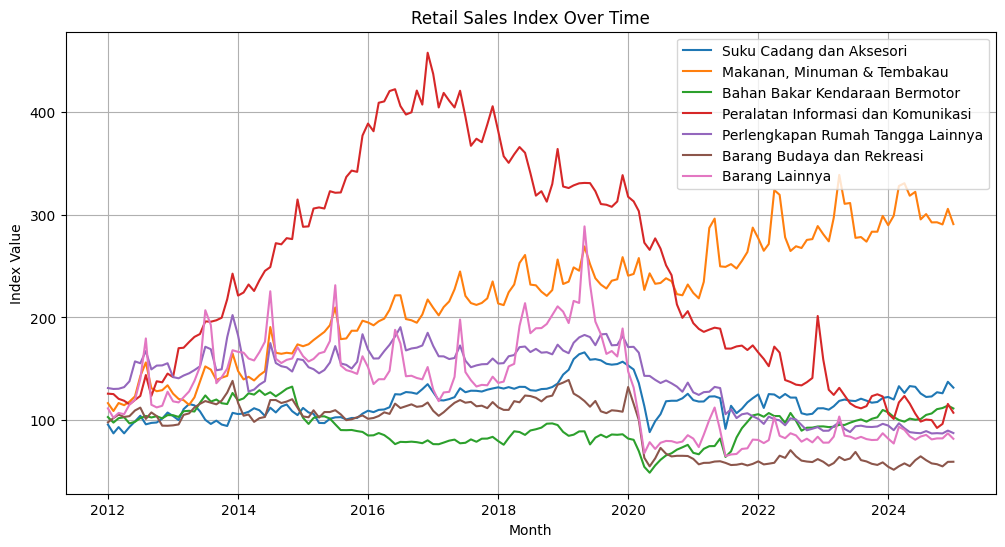

In [ ]:
# prompt: visualisasikan df

import matplotlib.pyplot as plt
# Set the 'Month' column as the index
df.set_index('Month', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Retail Sales Index Over Time')
plt.xlabel('Month')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

## Z-Score Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalisasi menggunakan Z-score
df_normalized = df.copy()
df_normalized.iloc[:, :] = scaler.fit_transform(df.iloc[:, :])

df_normalized

Suku Cadang dan Aksesori  Makanan, Minuman & Tembakau  \
Month                                                               
2012-01-01                 -1.408381                    -1.827705   
2012-02-01                 -1.928498                    -1.961708   
2012-03-01                 -1.559578                    -1.825965   
2012-04-01                 -1.928498                    -1.862511   
2012-05-01                 -1.553530                    -1.803341   
...                              ...                          ...   
2024-09-01                  0.248733                     1.240447   
2024-10-01                  0.496695                     1.242188   
2024-11-01                  0.436217                     1.205641   
2024-12-01                  1.113577                     1.470167   
2025-01-01                  0.768849                     1.210862   

            Bahan Bakar Kendaraan Bermotor  \
Month                                        
2012-01-01                        0.540778   
2012-02-01                        0.214161   
2012-03-01                        0.474245   
2012-04-01                        0.528681   
2012-05-01                        0.165774   
...                                    ...   
2024-09-01                        0.752474   
2024-10-01                        1.006509   
2024-11-01                        1.073042   
2024-12-01                        1.218205   
2025-01-01                        1.048848   

            Peralatan Informasi dan Komunikasi  \
Month                                            
2012-01-01                           -1.136690   
2012-02-01                           -1.140494   
2012-03-01                           -1.184234   
2012-04-01                           -1.202300   
2012-05-01                           -1.236532   
...                                        ...   
2024-09-01                           -1.382015   
2024-10-01                           -1.454281   
2024-11-01                           -1.417197   
2024-12-01                           -1.231777   
2025-01-01                           -1.313552   

            Perlengkapan Rumah Tangga Lainnya  Barang Budaya dan Rekreasi  \
Month                                                                       
2012-01-01                          -0.288364                    0.194529   
2012-02-01                          -0.316938                    0.350875   
2012-03-01                          -0.310588                    0.480529   
2012-04-01                          -0.259791                    0.392822   
2012-05-01                          -0.078825                    0.423329   
...                                       ...                         ...   
2024-09-01                          -1.694817                   -1.334619   
2024-10-01                          -1.685293                   -1.365126   
2024-11-01                          -1.694817                   -1.445206   
2024-12-01                          -1.605922                   -1.277419   
2025-01-01                          -1.682118                   -1.273606   

            Barang Lainnya  
Month                       
2012-01-01       -0.408667  
2012-02-01       -0.611136  
2012-03-01       -0.507701  
2012-04-01       -0.534110  
2012-05-01       -0.327239  
...                    ...  
2024-09-01       -1.075495  
2024-10-01       -1.053488  
2024-11-01       -1.053488  
2024-12-01       -0.945651  
2025-01-01       -1.062291  

[157 rows x 7 columns]

In [ ]:
df_normalized.head(12)

Suku Cadang dan Aksesori  Makanan, Minuman & Tembakau  \
Month                                                               
2012-01-01                 -1.408381                    -1.827705   
2012-02-01                 -1.928498                    -1.961708   
2012-03-01                 -1.559578                    -1.825965   
2012-04-01                 -1.928498                    -1.862511   
2012-05-01                 -1.553530                    -1.803341   
2012-06-01                 -1.226946                    -1.712845   
2012-07-01                 -0.888265                    -1.370006   
2012-08-01                 -1.396286                    -1.136805   
2012-09-01                 -1.311616                    -1.573621   
2012-10-01                 -1.287424                    -1.625830   
2012-11-01                 -1.057605                    -1.608427   
2012-12-01                 -0.700782                    -1.524893   

            Bahan Bakar Kendaraan Bermotor  \
Month                                        
2012-01-01                        0.540778   
2012-02-01                        0.214161   
2012-03-01                        0.474245   
2012-04-01                        0.528681   
2012-05-01                        0.165774   
2012-06-01                        0.262549   
2012-07-01                        0.480293   
2012-08-01                        0.607311   
2012-09-01                        0.516584   
2012-10-01                        0.589166   
2012-11-01                        0.462148   
2012-12-01                        0.655699   

            Peralatan Informasi dan Komunikasi  \
Month                                            
2012-01-01                           -1.136690   
2012-02-01                           -1.140494   
2012-03-01                           -1.184234   
2012-04-01                           -1.202300   
2012-05-01                           -1.236532   
2012-06-01                           -1.194693   
2012-07-01                           -1.157609   
2012-08-01                           -0.963632   
2012-09-01                           -1.157609   
2012-10-01                           -1.021635   
2012-11-01                           -1.031143   
2012-12-01                           -0.950319   

            Perlengkapan Rumah Tangga Lainnya  Barang Budaya dan Rekreasi  \
Month                                                                       
2012-01-01                          -0.288364                    0.194529   
2012-02-01                          -0.316938                    0.350875   
2012-03-01                          -0.310588                    0.480529   
2012-04-01                          -0.259791                    0.392822   
2012-05-01                          -0.078825                    0.423329   
2012-06-01                           0.537094                    0.633062   
2012-07-01                           0.479946                    0.739836   
2012-08-01                           0.857752                    0.320369   
2012-09-01                           0.289456                    0.560609   
2012-10-01                           0.406925                    0.423329   
2012-11-01                           0.413275                    0.068689   
2012-12-01                           0.479946                    0.064875   

            Barang Lainnya  
Month                       
2012-01-01       -0.408667  
2012-02-01       -0.611136  
2012-03-01       -0.507701  
2012-04-01       -0.534110  
2012-05-01       -0.327239  
2012-06-01       -0.226005  
2012-07-01        0.222949  
2012-08-01        1.092246  
2012-09-01       -0.331641  
2012-10-01       -0.388860  
2012-11-01       -0.353648  
2012-12-01       -0.052145

In [ ]:
df_normalized.reset_index(inplace=True)
# 1. Ubah DataFrame dari format wide ke long format menggunakan melt
df_long = pd.melt(df_normalized, id_vars=['Month'],
                    value_vars=['Suku Cadang dan Aksesori', 'Makanan, Minuman & Tembakau',
                                'Bahan Bakar Kendaraan Bermotor', 'Peralatan Informasi dan Komunikasi',
                                'Perlengkapan Rumah Tangga Lainnya', 'Barang Budaya dan Rekreasi',
                                'Barang Lainnya'], # Ganti dengan list kolom kategori Anda yang sebenarnya
                    var_name='item_id', value_name='target')
df_long

Month                   item_id    target
0    2012-01-01  Suku Cadang dan Aksesori -1.408381
1    2012-02-01  Suku Cadang dan Aksesori -1.928498
2    2012-03-01  Suku Cadang dan Aksesori -1.559578
3    2012-04-01  Suku Cadang dan Aksesori -1.928498
4    2012-05-01  Suku Cadang dan Aksesori -1.553530
...         ...                       ...       ...
1094 2024-09-01            Barang Lainnya -1.075495
1095 2024-10-01            Barang Lainnya -1.053488
1096 2024-11-01            Barang Lainnya -1.053488
1097 2024-12-01            Barang Lainnya -0.945651
1098 2025-01-01            Barang Lainnya -1.062291

[1099 rows x 3 columns]

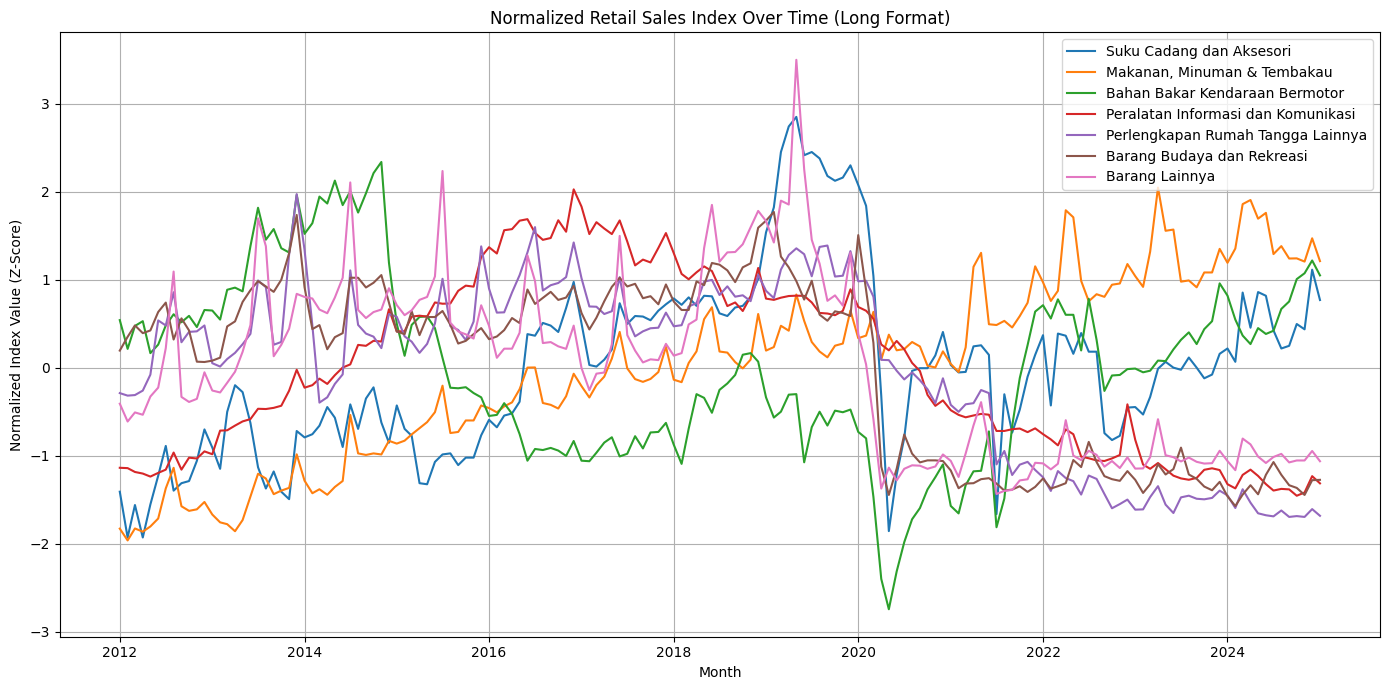

In [ ]:
# prompt: visualisasi df_long

import matplotlib.pyplot as plt
# Assuming df_long is already created as per the preceding code
plt.figure(figsize=(14, 7))
for item in df_long['item_id'].unique():
    subset = df_long[df_long['item_id'] == item]
    plt.plot(subset['Month'], subset['target'], label=item)

plt.title('Normalized Retail Sales Index Over Time (Long Format)')
plt.xlabel('Month')
plt.ylabel('Normalized Index Value (Z-Score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'df_long' is your DataFrame
# Split the data into training and testing sets
train_cutoff = "2024-02-01"  # Data up to January 2024 will be used for training

# Correctly filter the DataFrame using the 'Month' column
train_data = df_long[df_long['Month'] < train_cutoff]
test_data = df_long.copy()

print(f"Training data length: {len(train_data)}")
print(f"Testing data length: {len(test_data)}")


Training data length: 1015
Testing data length: 1099


In [ ]:
train_data

Month                   item_id    target
0    2012-01-01  Suku Cadang dan Aksesori -1.408381
1    2012-02-01  Suku Cadang dan Aksesori -1.928498
2    2012-03-01  Suku Cadang dan Aksesori -1.559578
3    2012-04-01  Suku Cadang dan Aksesori -1.928498
4    2012-05-01  Suku Cadang dan Aksesori -1.553530
...         ...                       ...       ...
1082 2023-09-01            Barang Lainnya -1.068893
1083 2023-10-01            Barang Lainnya -1.088700
1084 2023-11-01            Barang Lainnya -1.084298
1085 2023-12-01            Barang Lainnya -0.943450
1086 2024-01-01            Barang Lainnya -1.060090

[1015 rows x 3 columns]

In [ ]:
test_data

Month                   item_id    target
0    2012-01-01  Suku Cadang dan Aksesori -1.408381
1    2012-02-01  Suku Cadang dan Aksesori -1.928498
2    2012-03-01  Suku Cadang dan Aksesori -1.559578
3    2012-04-01  Suku Cadang dan Aksesori -1.928498
4    2012-05-01  Suku Cadang dan Aksesori -1.553530
...         ...                       ...       ...
1094 2024-09-01            Barang Lainnya -1.075495
1095 2024-10-01            Barang Lainnya -1.053488
1096 2024-11-01            Barang Lainnya -1.053488
1097 2024-12-01            Barang Lainnya -0.945651
1098 2025-01-01            Barang Lainnya -1.062291

[1099 rows x 3 columns]

In [ ]:
train_data = TimeSeriesDataFrame.from_data_frame(
    train_data,
    id_column='item_id',
    timestamp_column="Month"
)
test_data = TimeSeriesDataFrame.from_data_frame(
    test_data,
    id_column='item_id',
    timestamp_column="Month"
)


In [ ]:
metrics_list = [
    "SQL",    # Scaled quantile loss
    "WQL",    # Weighted quantile loss
    "MAE",    # Mean absolute error
    "MAPE",   # Mean absolute percentage error
    "MASE",   # Mean absolute scaled error
    "MSE",    # Mean squared error
    "RMSE",   # Root mean squared error
    "RMSLE",  # Root mean squared logarithmic error
    "RMSSE",  # Root mean squared scaled error
    "SMAPE",  # Symmetric mean absolute percentage error
    "WAPE"    # Weighted absolute percentage error
]

In [ ]:
# Predict Length
prediction_length = 12

# All Save Path

In [ ]:
auto_tune_save = '/content/drive/MyDrive/Skripsi/auto_tune_models'
manual_tune_save = '/content/drive/MyDrive/Skripsi/manual_tune_models'
llm_zeroshot_save = '/content/drive/MyDrive/Skripsi/llm_zeroshot_models'
llm_finetune_save = '/content/drive/MyDrive/Skripsi/llm_finetune_models'

#AutoGluon "Best Quality" Models

In [ ]:
predictor_best_quality = TimeSeriesPredictor(
    prediction_length=prediction_length,
    target="target",
    path=auto_tune_save
)

predictor_best_quality.fit(
    train_data,
    presets="best_quality",
    excluded_model_types=["Chronos"],
    enable_ensemble=False,
)

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/Skripsi/auto_tune_models'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
GPU Count:          1
Memory Avail:       11.25 GB / 12.67 GB (88.7%)
Disk Space Avail:   68.11 GB / 112.64 GB (60.5%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': WQL,
 'excluded_model_types': ['Chronos'],
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 12,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train

In [ ]:
predictions_best_quality = predictor_best_quality.predict(train_data) # Prediksi menggunakan data testing
print("\nPrediksi pada Data Testing:")
predictions_best_quality

Model not specified in predict, will default to the model with the best validation score: AutoETS



Prediksi pada Data Testing:


mean       0.1       0.2       0.3  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01  0.218487 -0.291735 -0.116586  0.009709   
                         2024-03-01  0.218487 -0.503040 -0.255354 -0.076756   
                         2024-04-01  0.218487 -0.665185 -0.361838 -0.143104   
                         2024-05-01  0.218487 -0.801881 -0.451609 -0.199039   
                         2024-06-01  0.218487 -0.922313 -0.530700 -0.248319   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -1.138442 -2.164414 -1.812219 -1.558261   
                         2024-10-01 -1.107808 -2.185120 -1.815301 -1.548635   
                         2024-11-01 -1.110293 -2.236605 -1.849965 -1.571170   
                         2024-12-01 -0.951196 -2.124464 -1.721706 -1.431288   
                         2025-01-01 -1.060577 -2.278993 -1.860736 -1.559143   

                                          0.4       0.5       0.6       0.7  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01  0.117623  0.218487  0.319352  0.427266   
                         2024-03-01  0.075850  0.218487  0.361125  0.513730   
                         2024-04-01  0.043796  0.218487  0.393179  0.580079   
                         2024-05-01  0.016773  0.218487  0.420202  0.636014   
                         2024-06-01 -0.007035  0.218487  0.444010  0.685294   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -1.341264 -1.138442 -0.935619 -0.718622   
                         2024-10-01 -1.320780 -1.107808 -0.894837 -0.666981   
                         2024-11-01 -1.332951 -1.110293 -0.887634 -0.649415   
                         2024-12-01 -1.183137 -0.951196 -0.719256 -0.471105   
                         2025-01-01 -1.301443 -1.060577 -0.819711 -0.562011   

                                          0.8       0.9  
item_id                  timestamp                       
Suku Cadang dan Aksesori 2024-02-01  0.553561  0.728710  
                         2024-03-01  0.692329  0.940015  
                         2024-04-01  0.798813  1.102159  
                         2024-05-01  0.888584  1.238855  
                         2024-06-01  0.967674  1.359288  
...                                       ...       ...  
Barang Lainnya           2024-09-01 -0.464664 -0.112469  
                         2024-10-01 -0.400316 -0.030497  
                         2024-11-01 -0.370620  0.016019  
                         2024-12-01 -0.180687  0.222072  
                         2025-01-01 -0.260418  0.157839  

[84 rows x 10 columns]

## Visualization

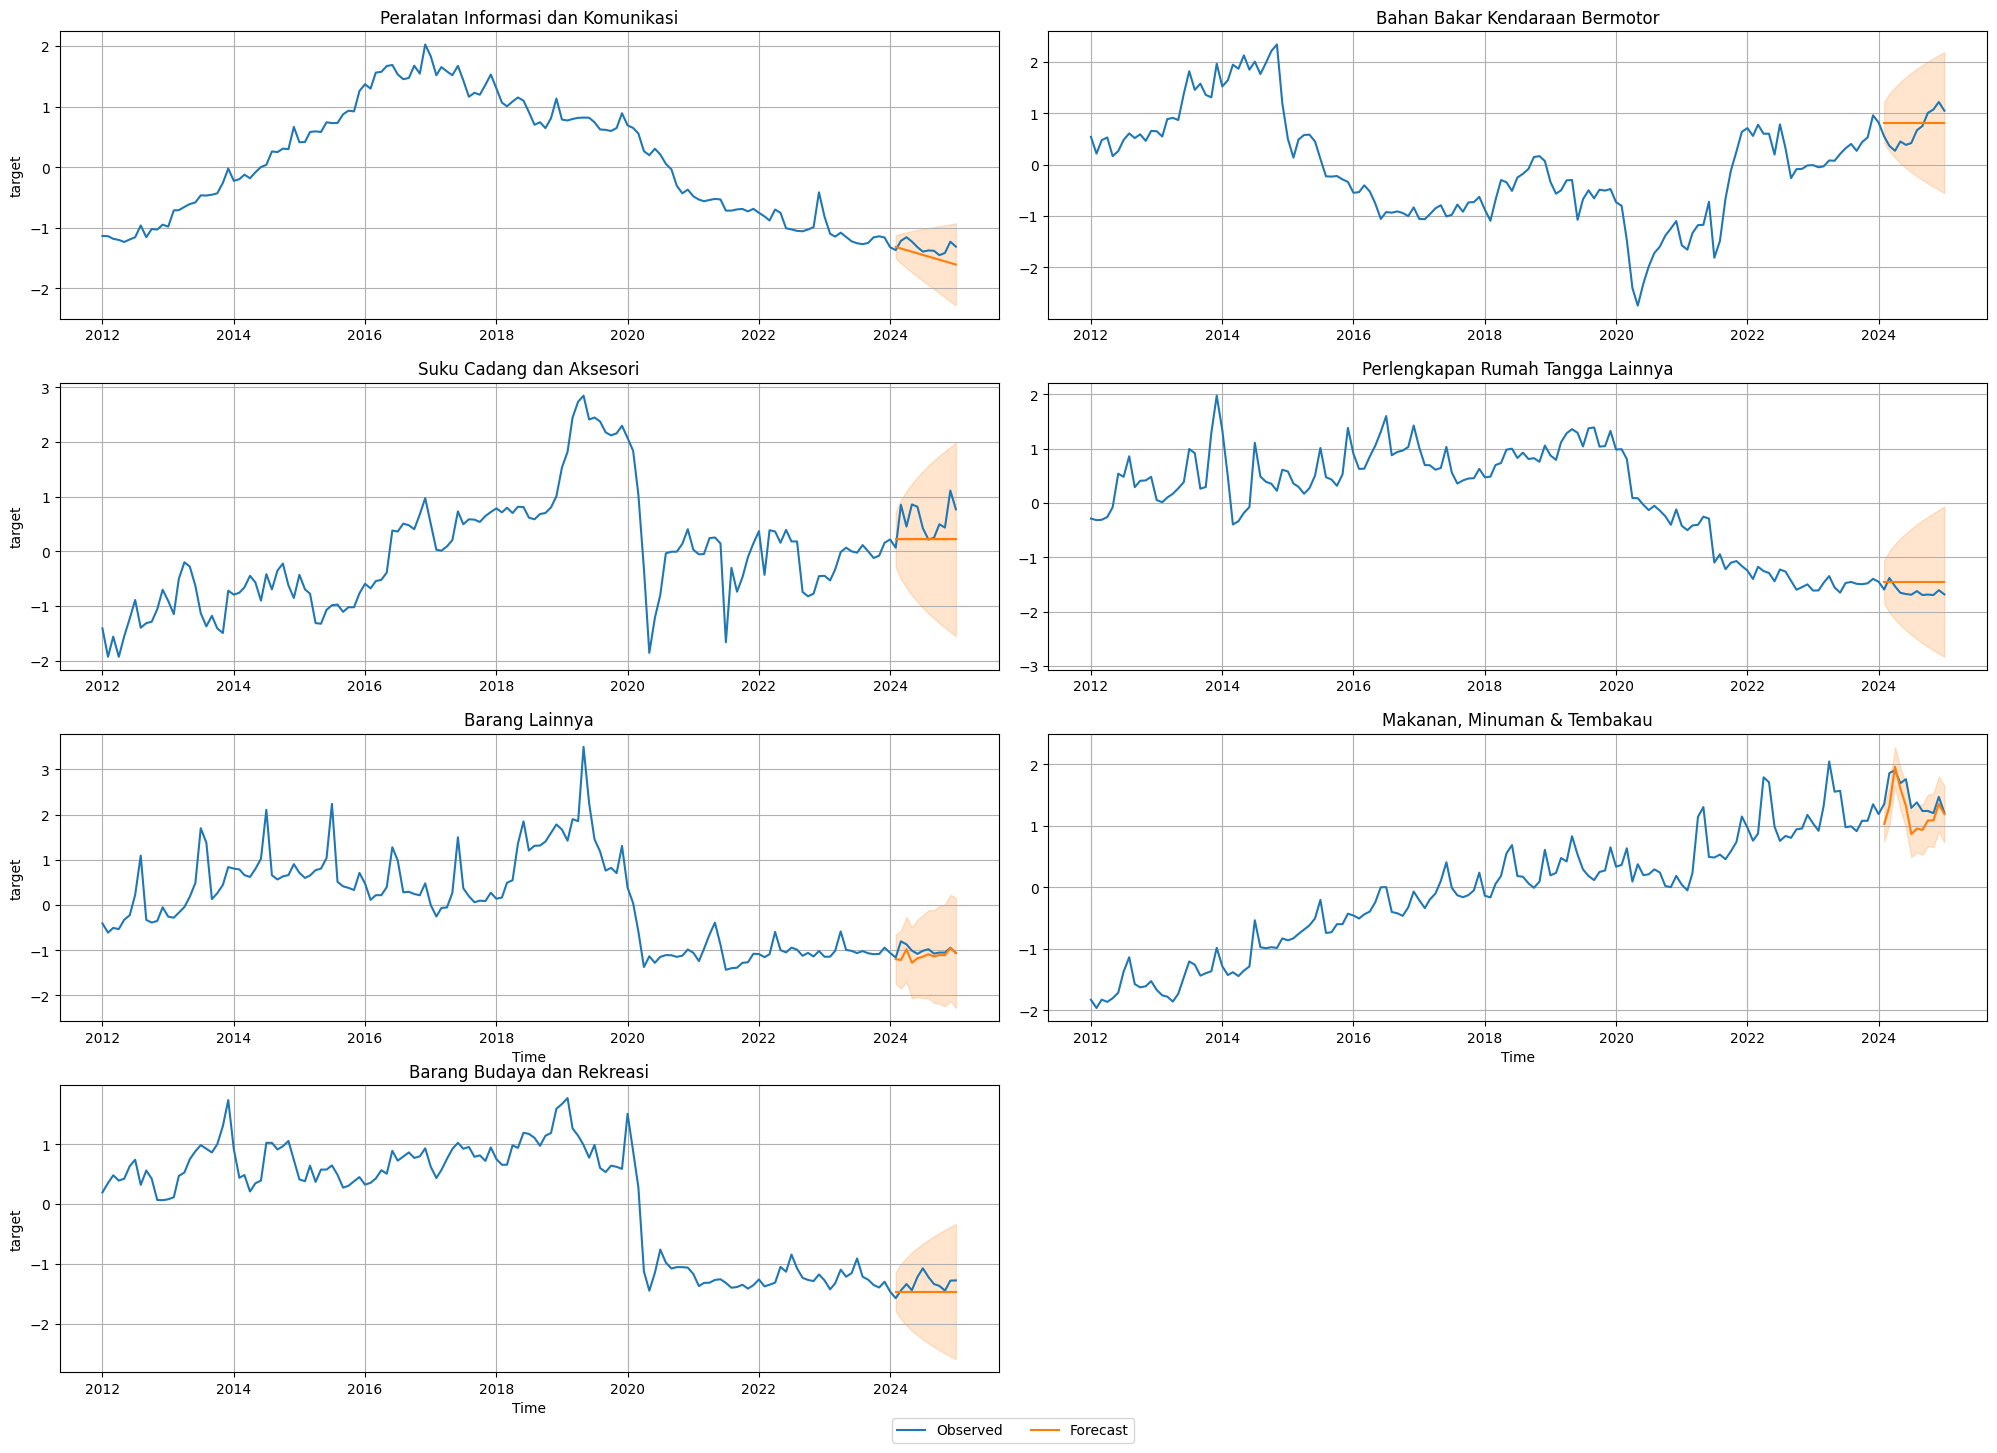

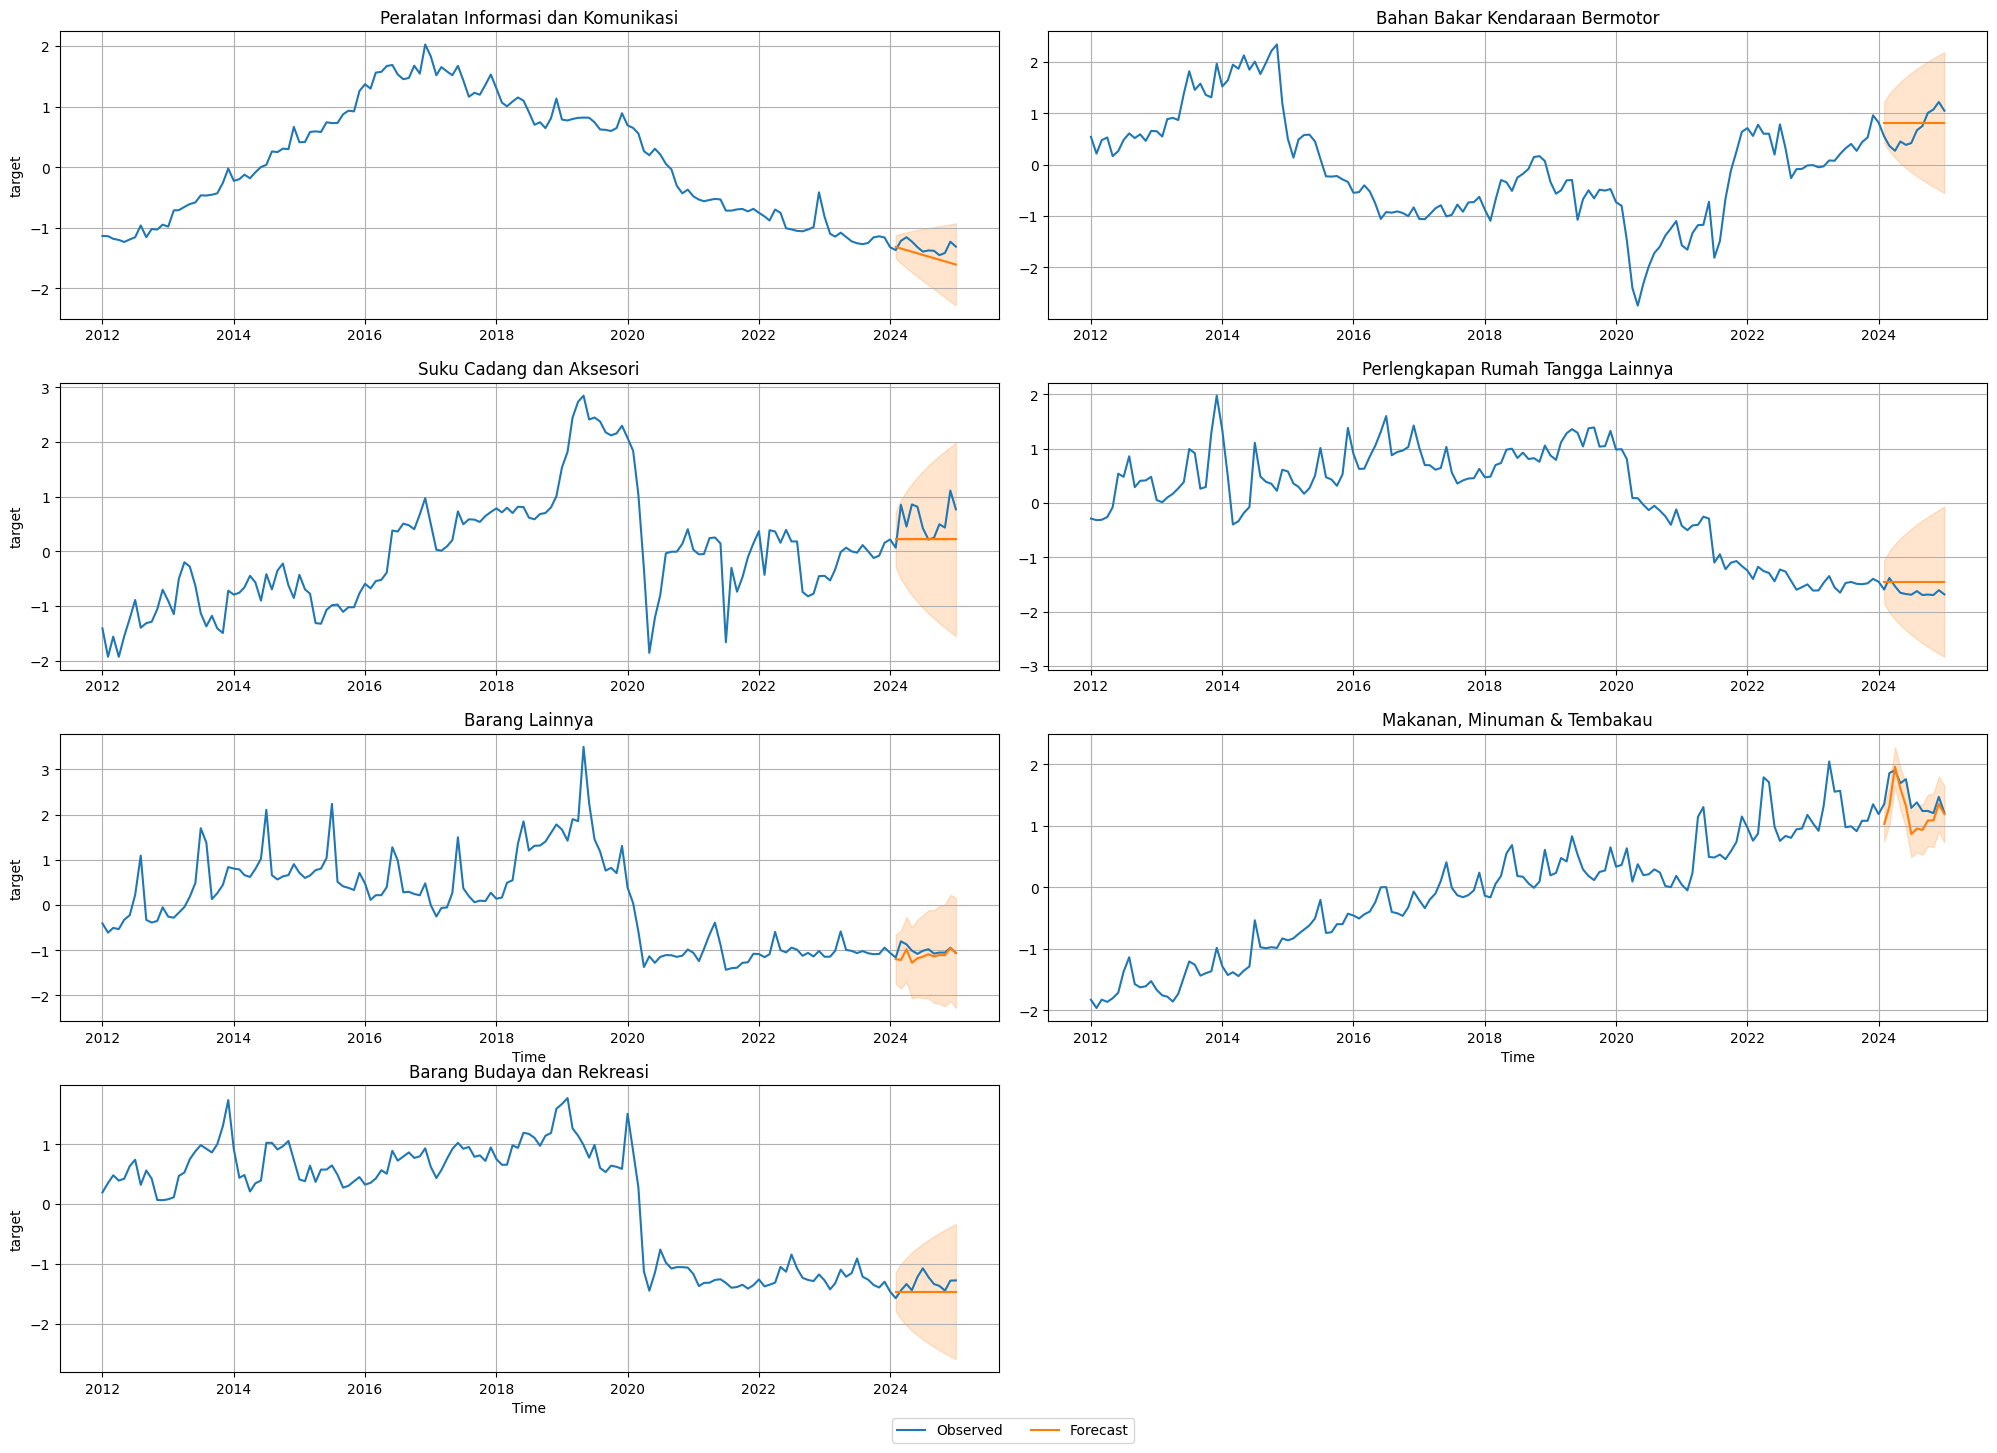

In [ ]:
predictor_best_quality.plot(test_data, predictions_best_quality, quantile_levels=[0.1, 0.9], max_history_length=200)

In [ ]:
leaderboard_best_quality = predictor_best_quality.leaderboard(test_data, extra_metrics=metrics_list)
print("\nleaderboard Model pada Data Testing:")
leaderboard_best_quality

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).



leaderboard Model pada Data Testing:


model  score_test  score_val  pred_time_test  \
0                    AutoETS   -0.190146  -0.264443        0.222347   
1      DynamicOptimizedTheta   -0.202605  -0.281255        0.082808   
2              SeasonalNaive   -0.223951  -0.376401        0.028792   
3           RecursiveTabular   -0.238208  -0.473682        0.246658   
4                   PatchTST   -0.258150  -0.272743        0.072522   
5                       TiDE   -0.277633  -0.344681        0.122060   
6  TemporalFusionTransformer   -0.281244  -0.280449        0.086259   
7              DirectTabular   -0.427603  -0.434569        0.160474   
8                     DeepAR   -0.454279  -0.399010        0.126022   
9                       NPTS   -0.671853  -0.923830        0.167649   

   pred_time_val  fit_time_marginal  fit_order       SQL       WQL       MAE  \
0       0.400963           0.412901          6 -0.389523 -0.190146 -0.218462   
1       0.074686           2.648161          5 -0.418029 -0.202605 -0.216570   
2       0.018006           0.078850          1 -0.440575 -0.223951 -0.237156   
3       0.286855           2.491689          2 -0.440896 -0.238208 -0.259681   
4       0.019993          47.642395          9 -0.588431 -0.258150 -0.373402   
5       0.025239         230.014764         10 -0.614565 -0.277633 -0.430213   
6       0.025581         124.096323          7 -0.531229 -0.281244 -0.359447   
7       0.175414          39.769661          3 -1.048020 -0.427603 -0.606914   
8       0.091036          47.448357          8 -1.016989 -0.454279 -0.629796   
9       0.093076           0.126938          4 -1.541251 -0.671853 -1.131875   

       MAPE      MASE       MSE      RMSE     RMSLE     RMSSE     SMAPE  \
0 -0.283583 -0.395832 -0.078036 -0.279348 -0.893940 -0.411493 -0.275538   
1 -0.282511 -0.381702 -0.079806 -0.282500 -0.893000 -0.390859 -0.277486   
2 -0.391189 -0.403037 -0.109250 -0.330529 -0.912230 -0.420915 -0.456286   
3 -0.421547 -0.430627 -0.101197 -0.318115 -0.896969 -0.401412 -0.284873   
4 -0.416227 -0.750065 -0.235028 -0.484797 -0.931439 -0.880530 -0.514923   
5 -0.519417 -0.846530 -0.250213 -0.500213 -0.919677 -0.854846 -0.498061   
6 -0.605440 -0.590445 -0.224290 -0.473593 -0.926006 -0.568076 -0.497265   
7 -0.549476 -1.303543 -0.475656 -0.689678 -0.928030 -1.303315 -0.754066   
8 -0.525715 -1.233143 -0.627820 -0.792351 -0.903729 -1.201949 -0.797632   
9 -1.051255 -2.283843 -1.426211 -1.194241 -1.034545 -2.050890 -1.776331   

       WAPE  
0 -0.191064  
1 -0.189409  
2 -0.207414  
3 -0.227114  
4 -0.326573  
5 -0.376259  
6 -0.314368  
7 -0.530798  
8 -0.550812  
9 -0.989923

## Eval

In [ ]:
# Ekstrak Model dan Score dari Best Quality
eval_best_quality = leaderboard_best_quality[['model', 'SQL', 'WQL', 'MAE', 'MAPE', 'MSE', 'RMSE', 'SMAPE']].copy()
eval_best_quality

model       SQL       WQL       MAE      MAPE  \
0                    AutoETS -0.389523 -0.190146 -0.218462 -0.283583   
1      DynamicOptimizedTheta -0.418029 -0.202605 -0.216570 -0.282511   
2              SeasonalNaive -0.440575 -0.223951 -0.237156 -0.391189   
3           RecursiveTabular -0.440896 -0.238208 -0.259681 -0.421547   
4                   PatchTST -0.588431 -0.258150 -0.373402 -0.416227   
5                       TiDE -0.614565 -0.277633 -0.430213 -0.519417   
6  TemporalFusionTransformer -0.531229 -0.281244 -0.359447 -0.605440   
7              DirectTabular -1.048020 -0.427603 -0.606914 -0.549476   
8                     DeepAR -1.016989 -0.454279 -0.629796 -0.525715   
9                       NPTS -1.541251 -0.671853 -1.131875 -1.051255   

        MSE      RMSE     SMAPE  
0 -0.078036 -0.279348 -0.275538  
1 -0.079806 -0.282500 -0.277486  
2 -0.109250 -0.330529 -0.456286  
3 -0.101197 -0.318115 -0.284873  
4 -0.235028 -0.484797 -0.514923  
5 -0.250213 -0.500213 -0.498061  
6 -0.224290 -0.473593 -0.497265  
7 -0.475656 -0.689678 -0.754066  
8 -0.627820 -0.792351 -0.797632  
9 -1.426211 -1.194241 -1.776331

In [ ]:
# Download Hasil
eval_best_quality.to_csv("Best Quality Auto Tune.csv")
files.download("Best Quality Auto Tune.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# Manual Tuning Best Quality Models

In [ ]:
from autogluon.timeseries import TimeSeriesPredictor

predictor_bqfinetune = TimeSeriesPredictor(
    prediction_length=prediction_length,
    target="target",
    path=manual_tune_save
)

predictor_bqfinetune.fit(
    train_data,
    hyperparameters={
        "AutoETS": [
            {"seasonal_period": 12, "model": "additive",
             "ag_args": {"name_suffix": "-Finetuning"}},
        ],
        "DynamicOptimizedTheta": [
            {"seasonal_period": 12, "decomposition_type": "multiplicative",
             "ag_args": {"name_suffix": "-Finetuning"}},
        ],
        "SeasonalNaive": [
            {"seasonal_period": 12, "ag_args": {"name_suffix": "-Finetuning"}},
        ],
        "RecursiveTabular": [
            {"maxlags": 24, "use_lags": "auto", "regressor": "LightGBM",
             "ag_args": {"name_suffix": "-Finetuning"}},
        ],
        "DirectTabular": [
            {"maxlags": 24, "use_lags": "auto", "regressor": "LightGBM",
             "ag_args": {"name_suffix": "-Finetuning"}},
        ],
        "DeepAR": [
            {
                # "dropout_rate": 0.3,
                "context_length": prediction_length,
                "batch_size": 32,
                "lr": 1e-4,
                # "num_layers": 2,
                # "hidden_size": 40,
                "lr_scheduler_type": "cosine",
                # "weight_decay": 1e-6,
                "ag_args": {"name_suffix": "-Finetuning"},
            },
        ],
        "TemporalFusionTransformer": [
            {
                # "hidden_size": 48,
                # "dropout_rate": 0.3,
                "context_length": prediction_length,
                "batch_size": 32,
                "lr": 1e-4,
                "lr_scheduler_type": "cosine",
                # "weight_decay": 1e-6,
                # "num_layers": 3,
                # "num_heads": 4,
                # "share_single_variable_networks": True,
                "ag_args": {"name_suffix": "-Finetuning"},
            },
        ],
        "TiDE": [
            {
                # "d_model": 64,
                # "d_ffn": 128,
                # "dropout": 0.3,
                "context_length": prediction_length,
                "batch_size": 32,
                "lr": 1e-4,
                "lr_scheduler_type": "cosine",
                # "weight_decay": 1e-6,
                # "num_layers": 4,
                "ag_args": {"name_suffix": "-Finetuning"},
            },
        ],
        "PatchTST": [
            {
                # "patch_len": 16,
                # "stride": 8,
                # "d_model": 64,
                # "n_heads": 4,
                # "num_layers": 4,
                # "dropout": 0.3,
                # "residual": True,
                "context_length": prediction_length,
                "batch_size": 32,
                "lr": 1e-4,
                "lr_scheduler_type": "cosine",
                # "weight_decay": 1e-6,
                "ag_args": {"name_suffix": "-Finetuning"},
            },
        ],
        "NPTS": [
            {
                "kernel_type": "exponential",         # Menggunakan kernel eksponensial yang memprioritaskan data baru.
                "exp_kernel_weights": 1.0,            # Bobot standar untuk kernel, titik awal yang baik.
                "use_seasonal_model": True,           # Mengaktifkan penanganan musiman internal, penting untuk data musiman.
                "num_default_time_features": 1,
                "ag_args": {"name_suffix": "-Finetuning"}
            },
        ],
    },
    enable_ensemble=False,
)


Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/Skripsi/manual_tune_models'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
GPU Count:          1
Memory Avail:       9.59 GB / 12.67 GB (75.6%)
Disk Space Avail:   67.95 GB / 112.64 GB (60.3%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': WQL,
 'hyperparameters': {'AutoETS': [{'ag_args': {'name_suffix': '-Finetuning'},
                                  'model': 'additive',
                                  'seasonal_period': 12}],
                     'DeepAR': [{'ag_args': {'name_suffix': '-Finetuning'},
                                 'batch_size': 32,
                                 'context_length': 12,
                                 'lr': 0.0001,
                      

In [ ]:
predictions_bqfinetune = predictor_bqfinetune.predict(train_data) # Prediksi menggunakan data testing
print("\nPrediksi pada Data Testing:")
predictions_bqfinetune

Model not specified in predict, will default to the model with the best validation score: TemporalFusionTransformer-Finetuning



Prediksi pada Data Testing:


mean       0.1       0.2       0.3  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01 -0.038731 -0.302066 -0.141556 -0.110046   
                         2024-03-01 -0.042870 -0.309440 -0.148269 -0.116614   
                         2024-04-01 -0.044919 -0.313466 -0.153652 -0.122305   
                         2024-05-01 -0.046520 -0.316052 -0.159058 -0.126755   
                         2024-06-01 -0.048133 -0.317624 -0.164485 -0.129984   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -1.013316 -1.191611 -1.098088 -1.067033   
                         2024-10-01 -1.014683 -1.188923 -1.099841 -1.065744   
                         2024-11-01 -1.015989 -1.185263 -1.100817 -1.063514   
                         2024-12-01 -1.017181 -1.180787 -1.101041 -1.060452   
                         2025-01-01 -1.005318 -1.181498 -1.069462 -1.056263   

                                          0.4       0.5       0.6       0.7  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01 -0.110311 -0.038731  0.001046  0.119134   
                         2024-03-01 -0.117811 -0.042870  0.008578  0.118199   
                         2024-04-01 -0.123991 -0.044919  0.015604  0.116153   
                         2024-05-01 -0.130339 -0.046520  0.022324  0.112938   
                         2024-06-01 -0.137204 -0.048133  0.028745  0.108376   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -1.085310 -1.013316 -0.946066 -0.917640   
                         2024-10-01 -1.089928 -1.014683 -0.943615 -0.924072   
                         2024-11-01 -1.094100 -1.015989 -0.941906 -0.930822   
                         2024-12-01 -1.097767 -1.017181 -0.940948 -0.937613   
                         2025-01-01 -1.047432 -1.005318 -0.976939 -0.892542   

                                          0.8       0.9  
item_id                  timestamp                       
Suku Cadang dan Aksesori 2024-02-01  0.192933  0.134259  
                         2024-03-01  0.195254  0.146552  
                         2024-04-01  0.196769  0.154594  
                         2024-05-01  0.197177  0.160688  
                         2024-06-01  0.196260  0.165523  
...                                       ...       ...  
Barang Lainnya           2024-09-01 -0.851312 -0.859071  
                         2024-10-01 -0.856533 -0.859754  
                         2024-11-01 -0.862636 -0.861574  
                         2024-12-01 -0.869366 -0.864399  
                         2025-01-01 -0.848779 -0.881454  

[84 rows x 10 columns]

In [ ]:
leaderboard_bqfinetune = predictor_bqfinetune.leaderboard(test_data, extra_metrics=metrics_list)
leaderboard_bqfinetune

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


model  score_test  score_val  \
0  TemporalFusionTransformer-Finetuning   -0.178895  -0.166887   
1                       TiDE-Finetuning   -0.180669  -0.229993   
2      DynamicOptimizedTheta-Finetuning   -0.202605  -0.272877   
3                   PatchTST-Finetuning   -0.210398  -0.254654   
4              SeasonalNaive-Finetuning   -0.223951  -0.284703   
5                    AutoETS-Finetuning   -0.223951  -0.284703   
6           RecursiveTabular-Finetuning   -0.238208  -0.450448   
7              DirectTabular-Finetuning   -0.405991  -0.429125   
8                     DeepAR-Finetuning   -0.407674  -0.483589   
9                       NPTS-Finetuning   -0.679675  -0.834085   

   pred_time_test  pred_time_val  fit_time_marginal  fit_order       SQL  \
0        0.089139       0.024328          45.585187          7 -0.346941   
1        0.060394       0.032790          33.970124          9 -0.401327   
2        0.070054       0.217972           0.018648          5 -0.418029   
3        0.048817       0.073618          32.650232         10 -0.506690   
4        0.027443       0.019954           0.018285          1 -0.440575   
5        0.028954       0.019477           0.018770          6 -0.440575   
6        0.199217       0.166876           1.605297          2 -0.440896   
7        0.193576       0.141594           9.232188          3 -1.002443   
8        0.095661       0.072098          52.196303          8 -0.887044   
9        0.112478       0.096730           0.018953          4 -1.568802   

        WQL       MAE      MAPE      MASE       MSE      RMSE     RMSLE  \
0 -0.178895 -0.242298 -0.296573 -0.409652 -0.127303 -0.356796 -0.922329   
1 -0.180669 -0.261331 -0.269655 -0.505276 -0.104814 -0.323751 -0.893037   
2 -0.202605 -0.216570 -0.282511 -0.381702 -0.079806 -0.282500 -0.893000   
3 -0.210398 -0.296391 -0.290852 -0.636013 -0.152486 -0.390495 -0.910079   
4 -0.223951 -0.237156 -0.391189 -0.403037 -0.109250 -0.330529 -0.912230   
5 -0.223951 -0.237156 -0.391189 -0.403037 -0.109250 -0.330529 -0.912230   
6 -0.238208 -0.259681 -0.421547 -0.430627 -0.101197 -0.318115 -0.896969   
7 -0.405991 -0.565055 -0.499463 -1.229545 -0.438430 -0.662140 -0.940425   
8 -0.407674 -0.585041 -0.529193 -1.124767 -0.464600 -0.681616 -0.904311   
9 -0.679675 -1.133133 -1.037078 -2.303988 -1.449299 -1.203868 -1.042967   

      RMSSE     SMAPE      WAPE  
0 -0.469990 -0.447998 -0.211910  
1 -0.536313 -0.307525 -0.228557  
2 -0.390859 -0.277486 -0.189409  
3 -0.814732 -0.347178 -0.259220  
4 -0.420915 -0.456286 -0.207414  
5 -0.420915 -0.456286 -0.207414  
6 -0.401412 -0.284873 -0.227114  
7 -1.332335 -0.680098 -0.494190  
8 -1.038843 -0.813697 -0.511669  
9 -2.093355 -1.761369 -0.991023

## Visualization

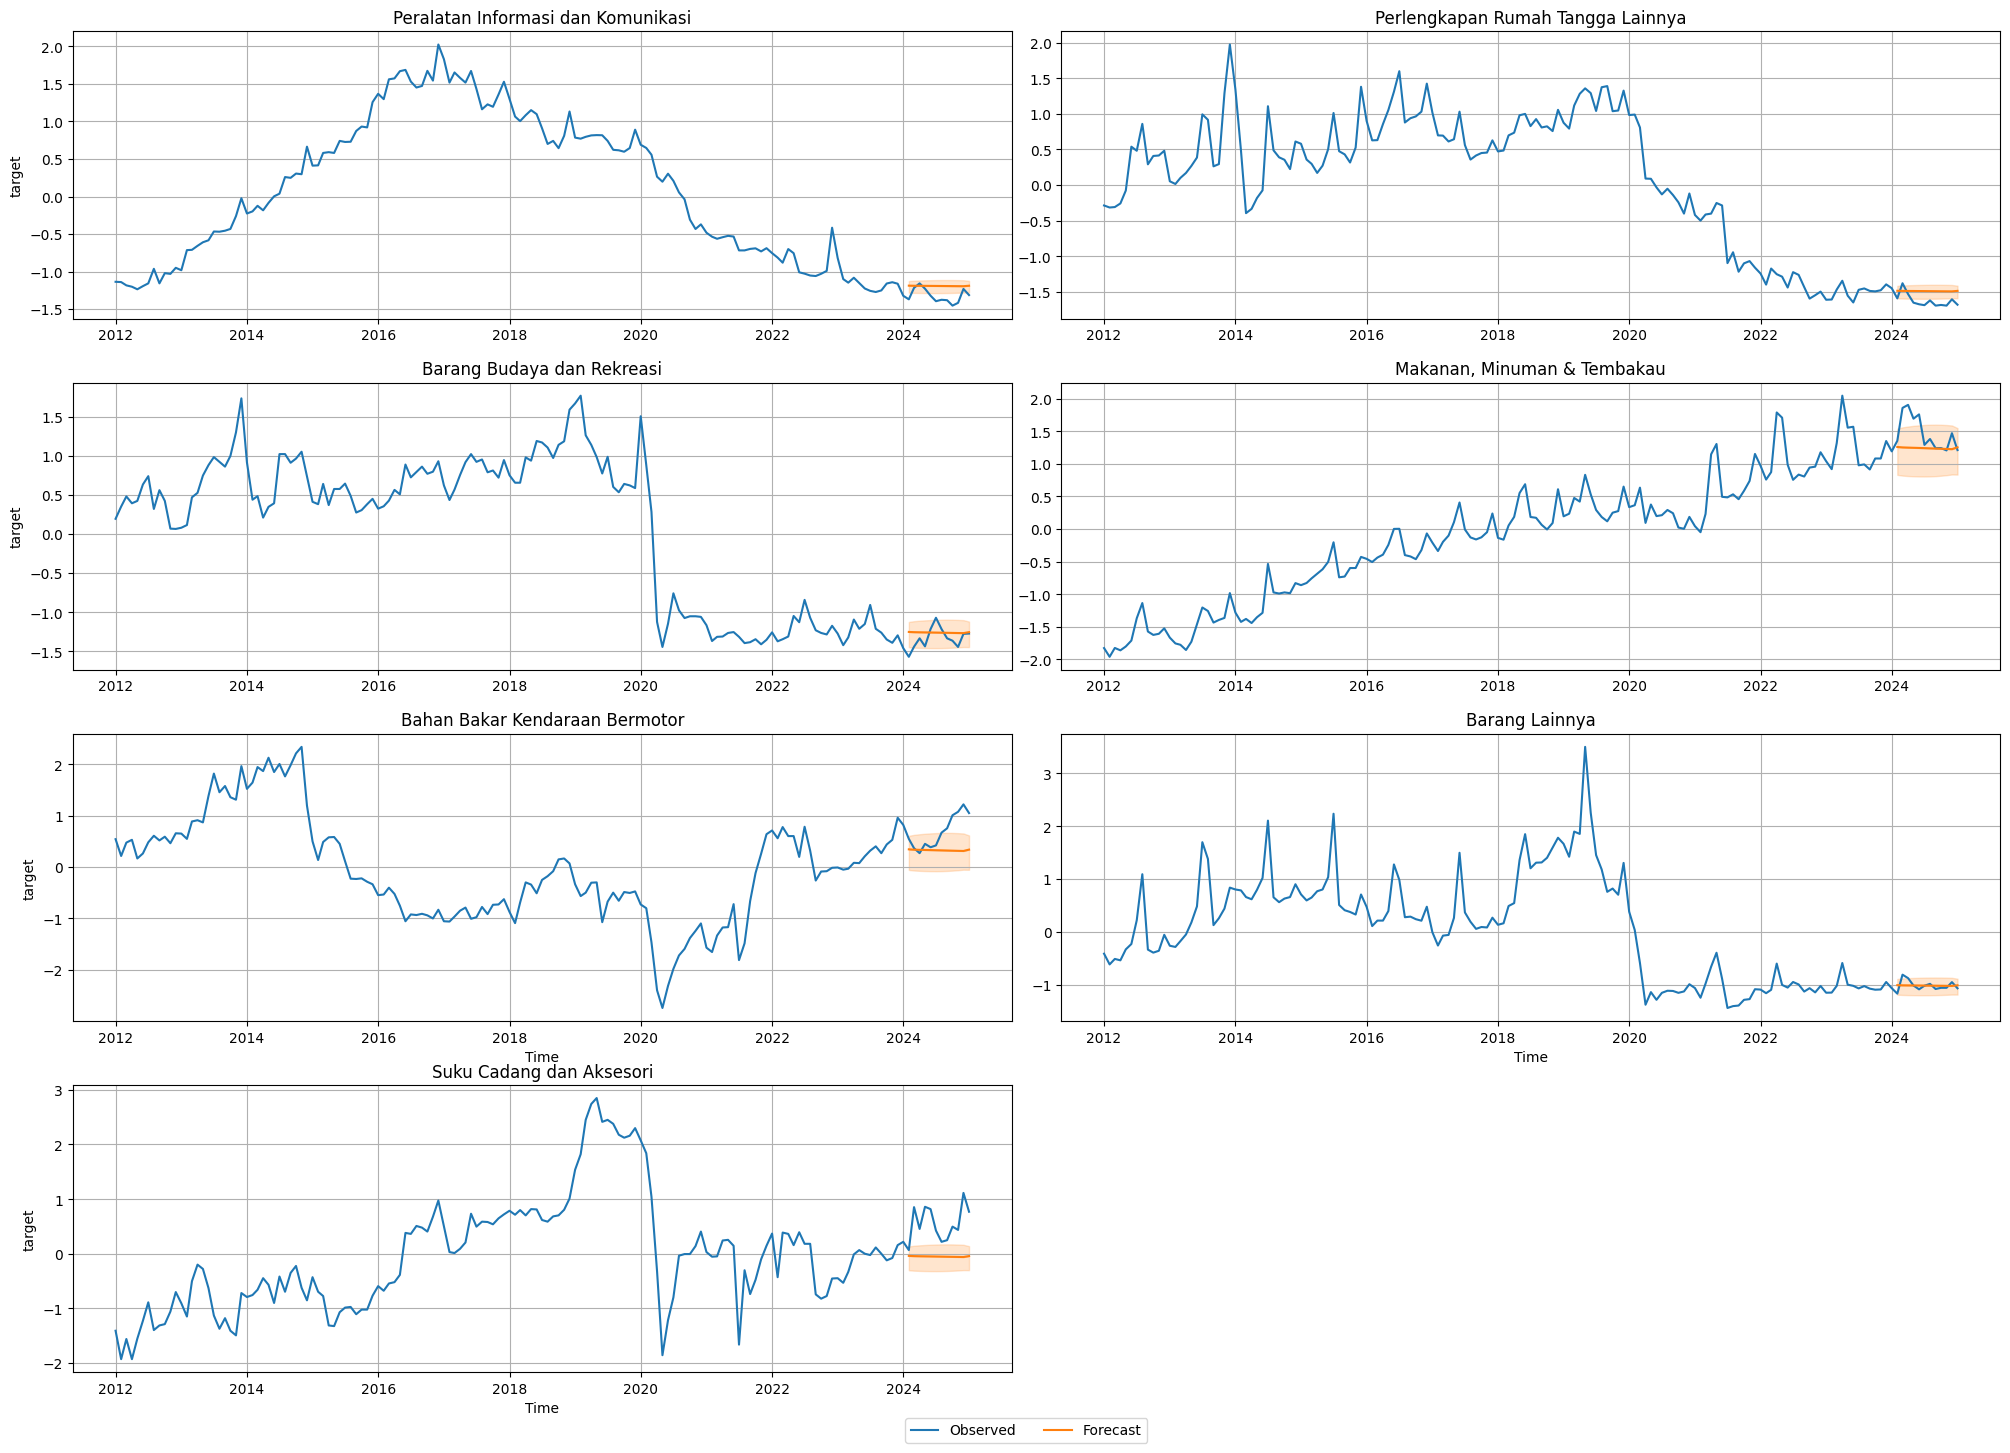

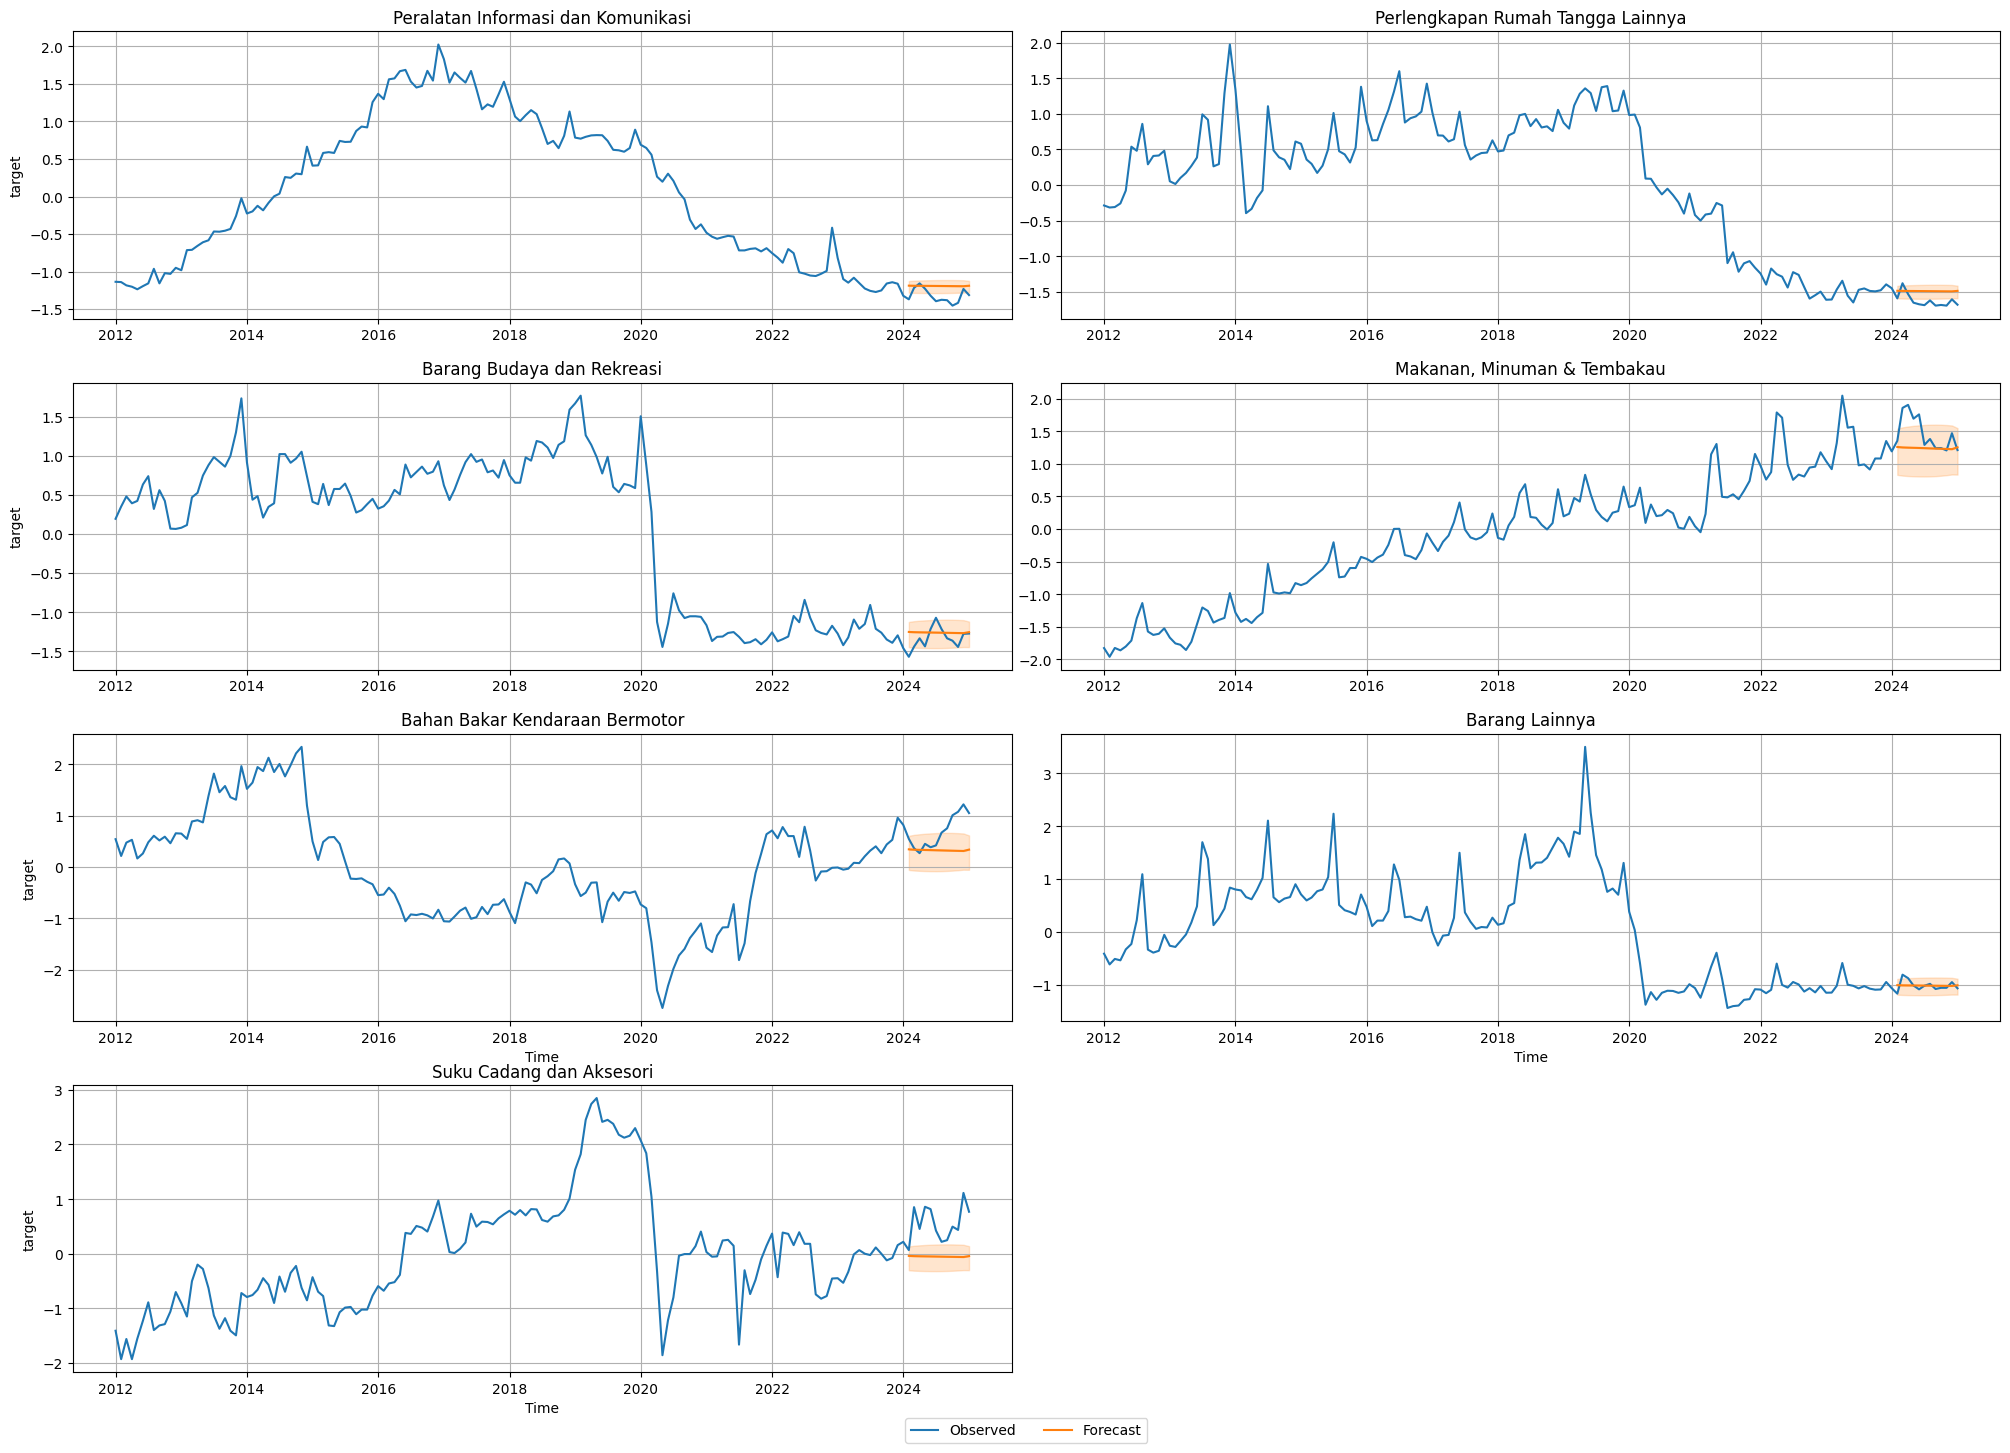

In [ ]:
predictor_bqfinetune.plot(test_data, predictions_bqfinetune, quantile_levels=[0.1, 0.9], max_history_length=200)

## Eval

In [ ]:
# Ekstrak Model dan Score dari Best Quality
eval_bqfinetune = leaderboard_bqfinetune[['model', 'SQL', 'WQL', 'MAE', 'MAPE', 'MSE', 'RMSE', 'SMAPE']].copy()
eval_bqfinetune

model       SQL       WQL       MAE  \
0  TemporalFusionTransformer-Finetuning -0.346941 -0.178895 -0.242298   
1                       TiDE-Finetuning -0.401327 -0.180669 -0.261331   
2      DynamicOptimizedTheta-Finetuning -0.418029 -0.202605 -0.216570   
3                   PatchTST-Finetuning -0.506690 -0.210398 -0.296391   
4              SeasonalNaive-Finetuning -0.440575 -0.223951 -0.237156   
5                    AutoETS-Finetuning -0.440575 -0.223951 -0.237156   
6           RecursiveTabular-Finetuning -0.440896 -0.238208 -0.259681   
7              DirectTabular-Finetuning -1.002443 -0.405991 -0.565055   
8                     DeepAR-Finetuning -0.887044 -0.407674 -0.585041   
9                       NPTS-Finetuning -1.568802 -0.679675 -1.133133   

       MAPE       MSE      RMSE     SMAPE  
0 -0.296573 -0.127303 -0.356796 -0.447998  
1 -0.269655 -0.104814 -0.323751 -0.307525  
2 -0.282511 -0.079806 -0.282500 -0.277486  
3 -0.290852 -0.152486 -0.390495 -0.347178  
4 -0.391189 -0.109250 -0.330529 -0.456286  
5 -0.391189 -0.109250 -0.330529 -0.456286  
6 -0.421547 -0.101197 -0.318115 -0.284873  
7 -0.499463 -0.438430 -0.662140 -0.680098  
8 -0.529193 -0.464600 -0.681616 -0.813697  
9 -1.037078 -1.449299 -1.203868 -1.761369

In [ ]:
# Download Hasil
eval_bqfinetune.to_csv("Best Quality Manual Tune.csv")
files.download("Best Quality Manual Tune.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Chronos  Zero Shot

In [ ]:
predictor_chronos = TimeSeriesPredictor(
    prediction_length=prediction_length,
    target="target",
    path=llm_zeroshot_save
)

predictor_chronos.fit(
    train_data,
    hyperparameters={
        "Chronos": [
            {"model_path": "bolt_tiny", "fine_tune": False},
            {"model_path": "bolt_mini", "fine_tune": False},
            {"model_path": "bolt_small", "fine_tune": False},
            {"model_path": "bolt_base", "fine_tune": False},
            {"model_path": "tiny", "fine_tune": False},
            {"model_path": "mini", "fine_tune": False},
            {"model_path": "small", "fine_tune": False},
            {"model_path": "base", "fine_tune": False},
            {"model_path": "large", "fine_tune": False},
        ]
    },
    enable_ensemble=False
)

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/Skripsi/llm_zeroshot_models'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
GPU Count:          1
Memory Avail:       9.53 GB / 12.67 GB (75.2%)
Disk Space Avail:   67.93 GB / 112.64 GB (60.3%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': [{'fine_tune': False,
                                  'model_path': 'bolt_tiny'},
                                 {'fine_tune': False,
                                  'model_path': 'bolt_mini'},
                                 {'fine_tune': False,
                                  'model_path': 'bolt_small'},
                                 {'fine_tune': False,
                                  'mod

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

	-0.2236       = Validation score (-WQL)
	2.46    s     = Training runtime
	3.04    s     = Validation (prediction) runtime
Training timeseries model Chronos[bolt_mini]. 


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/85.0M [00:00<?, ?B/s]

	-0.2476       = Validation score (-WQL)
	0.02    s     = Training runtime
	3.07    s     = Validation (prediction) runtime
Training timeseries model Chronos[bolt_small]. 


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/191M [00:00<?, ?B/s]

	-0.2802       = Validation score (-WQL)
	0.02    s     = Training runtime
	3.65    s     = Validation (prediction) runtime
Training timeseries model Chronos[bolt_base]. 


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/821M [00:00<?, ?B/s]

	-0.2678       = Validation score (-WQL)
	0.03    s     = Training runtime
	5.93    s     = Validation (prediction) runtime
Training timeseries model Chronos[tiny]. 


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

	-0.2343       = Validation score (-WQL)
	0.02    s     = Training runtime
	3.04    s     = Validation (prediction) runtime
Training timeseries model Chronos[mini]. 


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/81.8M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

	-0.2033       = Validation score (-WQL)
	0.08    s     = Training runtime
	6.03    s     = Validation (prediction) runtime
Training timeseries model Chronos[small]. 


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/185M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

	-0.1785       = Validation score (-WQL)
	0.04    s     = Training runtime
	11.56   s     = Validation (prediction) runtime
Training timeseries model Chronos[base]. 


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/806M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

	-0.1892       = Validation score (-WQL)
	0.03    s     = Training runtime
	38.53   s     = Validation (prediction) runtime
Training timeseries model Chronos[large]. 


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

	-0.2037       = Validation score (-WQL)
	0.03    s     = Training runtime
	127.01  s     = Validation (prediction) runtime
Training complete. Models trained: ['Chronos[bolt_tiny]', 'Chronos[bolt_mini]', 'Chronos[bolt_small]', 'Chronos[bolt_base]', 'Chronos[tiny]', 'Chronos[mini]', 'Chronos[small]', 'Chronos[base]', 'Chronos[large]']
Total runtime: 204.93 s
Best model: Chronos[small]
Best model score: -0.1785


In [ ]:
predictions_chronos = predictor_chronos.predict(train_data) # Prediksi menggunakan data testing
print("\nPrediksi pada Data Testing:")
predictions_chronos

Model not specified in predict, will default to the model with the best validation score: Chronos[small]



Prediksi pada Data Testing:


mean       0.1           0.2  \
item_id                  timestamp                                      
Suku Cadang dan Aksesori 2024-02-01  0.176147  0.092157  1.143208e-01   
                         2024-03-01  0.158941 -0.001750  7.349195e-02   
                         2024-04-01  0.126569 -0.070576  3.278712e-09   
                         2024-05-01  0.134735 -0.008166  1.633155e-02   
                         2024-06-01  0.149900 -0.033246  5.832699e-03   
...                                       ...       ...           ...   
Barang Lainnya           2024-09-01 -0.994452 -1.164117 -1.129878e+00   
                         2024-10-01 -1.005762 -1.139049 -1.104199e+00   
                         2024-11-01 -0.996286 -1.134158 -1.120095e+00   
                         2024-12-01 -0.964493 -1.142717 -1.094416e+00   
                         2025-01-01 -0.975804 -1.150666 -1.110313e+00   

                                          0.3       0.4       0.5       0.6  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01  0.136485  0.155150  0.177897  0.183147   
                         2024-03-01  0.114904  0.130652  0.166232  0.188979   
                         2024-04-01  0.110821  0.121320  0.148734  0.169148   
                         2024-05-01  0.068826  0.101489  0.125403  0.173814   
                         2024-06-01  0.103822  0.128319  0.145817  0.170315   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -1.095639 -1.072406 -1.017991 -0.977026   
                         2024-10-01 -1.085857 -1.082188 -1.051618 -1.030830   
                         2024-11-01 -1.108479 -1.088302 -1.069960 -1.039390   
                         2024-12-01 -1.069349 -1.056509 -1.005762 -0.969689   
                         2025-01-01 -1.093805 -1.061400 -1.048561 -0.978249   

                                          0.7       0.8       0.9  
item_id                  timestamp                                 
Suku Cadang dan Aksesori 2024-02-01  0.197728  0.225142  0.261888  
                         2024-03-01  0.219309  0.246140  0.298051  
                         2024-04-01  0.186063  0.213477  0.260721  
                         2024-05-01  0.188396  0.239140  0.264221  
                         2024-06-01  0.180813  0.257805  0.309133  
...                                       ...       ...       ...  
Barang Lainnya           2024-09-01 -0.944010 -0.882870 -0.810724  
                         2024-10-01 -0.978249 -0.933005 -0.791159  
                         2024-11-01 -0.976415 -0.898766 -0.695780  
                         2024-12-01 -0.903046 -0.820507 -0.678049  
                         2025-01-01 -0.937896 -0.896321 -0.643810  

[84 rows x 10 columns]

In [ ]:
leaderboard_chronos = predictor_chronos.leaderboard(test_data, extra_metrics=metrics_list)
leaderboard_chronos

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


model  score_test  score_val  pred_time_test  pred_time_val  \
0   Chronos[bolt_tiny]   -0.136658  -0.223643        1.843454       3.036902   
1   Chronos[bolt_mini]   -0.137217  -0.247589        2.311455       3.073757   
2   Chronos[bolt_base]   -0.144920  -0.267783        6.779521       5.928476   
3  Chronos[bolt_small]   -0.145395  -0.280239        3.014233       3.647840   
4       Chronos[small]   -0.145924  -0.178464        3.548198      11.558306   
5        Chronos[tiny]   -0.152041  -0.234276        2.187242       3.043269   
6        Chronos[base]   -0.156448  -0.189245        7.780775      38.530994   
7        Chronos[mini]   -0.161061  -0.203304        2.315982       6.033179   
8       Chronos[large]   -0.166709  -0.203653       21.484968     127.012626   

   fit_time_marginal  fit_order       SQL       WQL       MAE      MAPE  \
0           2.464351          1 -0.280166 -0.136658 -0.178180 -0.247151   
1           0.022624          2 -0.281644 -0.137217 -0.181477 -0.248134   
2           0.027792          4 -0.289353 -0.144920 -0.190620 -0.246664   
3           0.024436          3 -0.296329 -0.145395 -0.192457 -0.224241   
4           0.041754          7 -0.282606 -0.145924 -0.207695 -0.279430   
5           0.023926          5 -0.316878 -0.152041 -0.204741 -0.273477   
6           0.027437          8 -0.320084 -0.156448 -0.214294 -0.286416   
7           0.080811          6 -0.326485 -0.161061 -0.221261 -0.277462   
8           0.027301          9 -0.345592 -0.166709 -0.228856 -0.298947   

       MASE       MSE      RMSE     RMSLE     RMSSE     SMAPE      WAPE  
0 -0.317958 -0.052757 -0.229689 -0.883934 -0.345022 -0.215393 -0.155834  
1 -0.321820 -0.057155 -0.239070 -0.886254 -0.361351 -0.226149 -0.158717  
2 -0.327624 -0.070449 -0.265423 -0.894541 -0.363604 -0.253978 -0.166713  
3 -0.338436 -0.067152 -0.259136 -0.890425 -0.368553 -0.246336 -0.168321  
4 -0.354092 -0.078703 -0.280541 -0.898210 -0.364531 -0.298795 -0.181647  
5 -0.373084 -0.075667 -0.275076 -0.892666 -0.425798 -0.255564 -0.179063  
6 -0.381431 -0.079370 -0.281726 -0.896659 -0.409819 -0.293796 -0.187419  
7 -0.394789 -0.084888 -0.291355 -0.893403 -0.416637 -0.276211 -0.193512  
8 -0.414983 -0.089856 -0.299760 -0.899796 -0.445359 -0.324076 -0.200154

##Visulalization

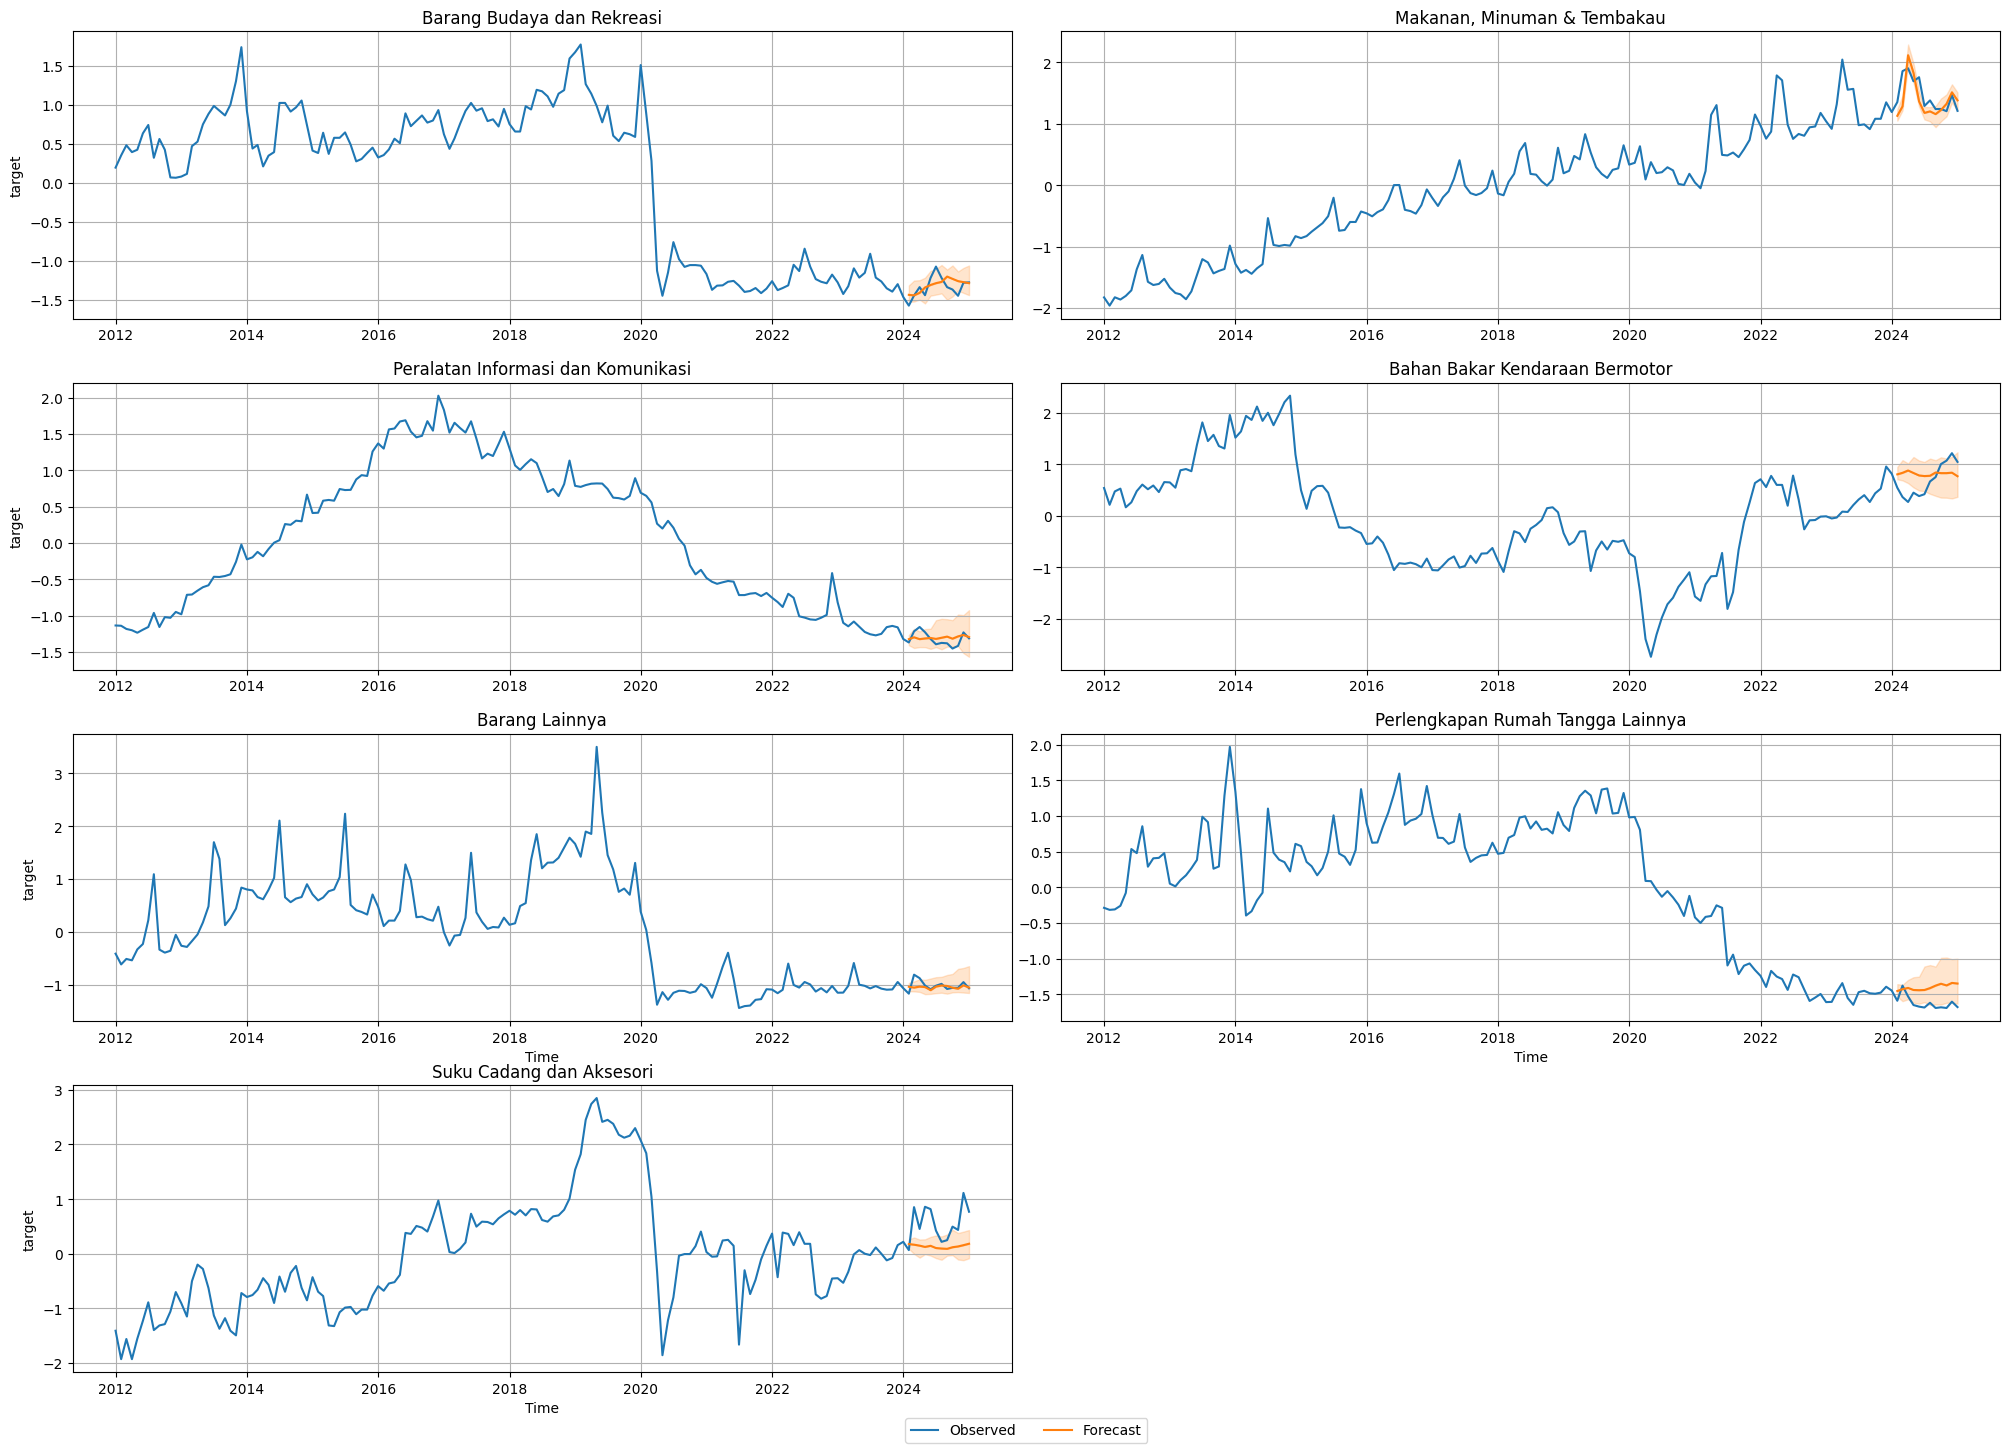

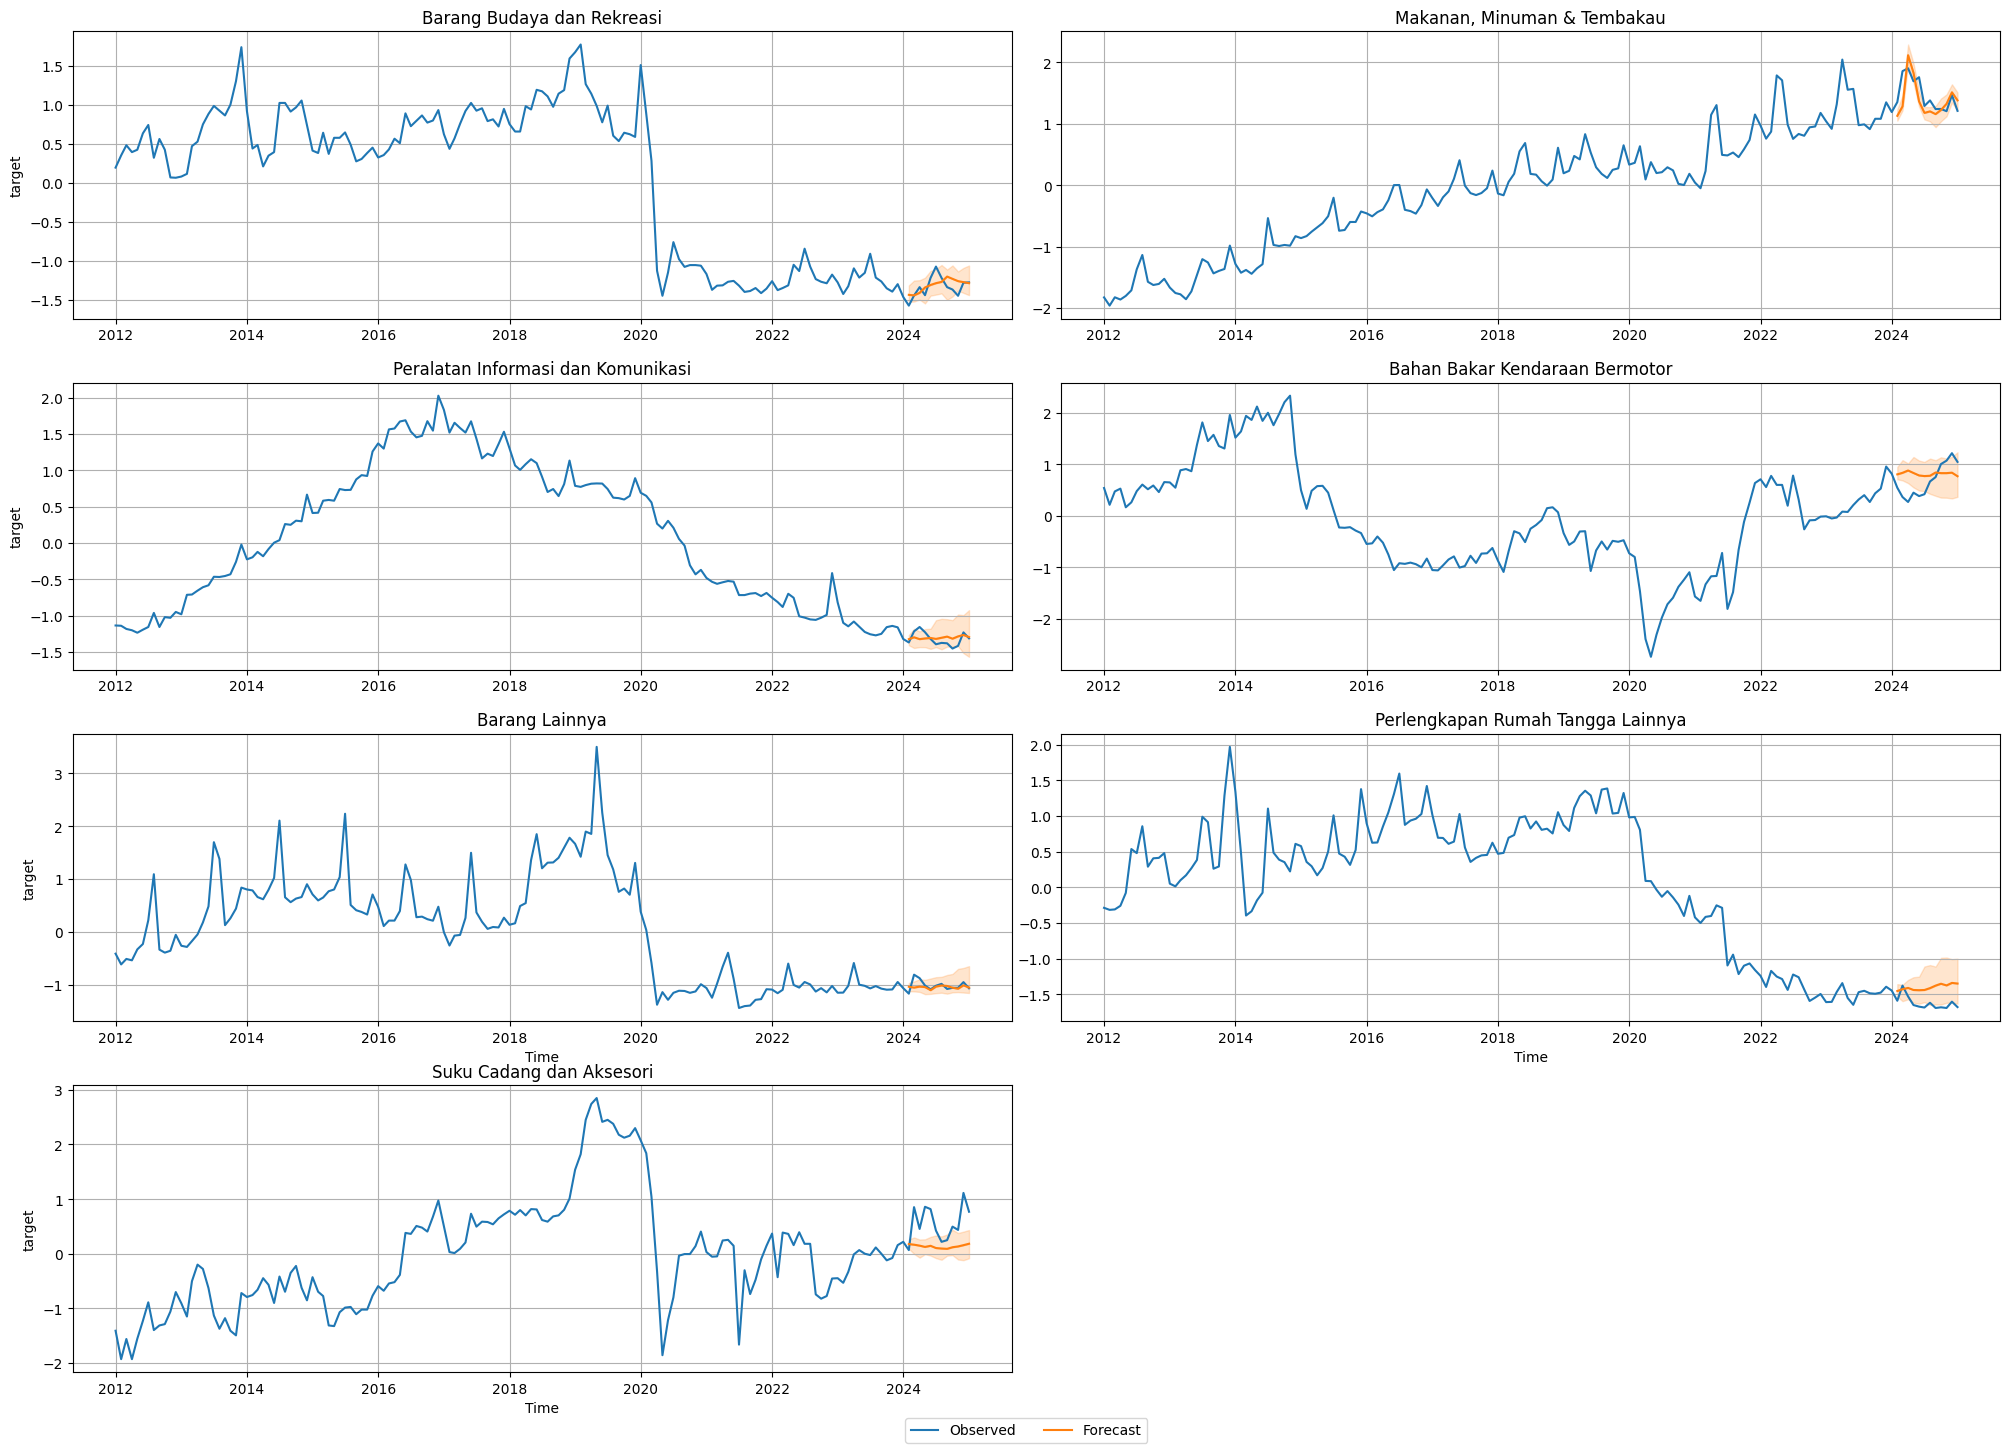

In [ ]:
predictor_chronos.plot(test_data, predictions_chronos, quantile_levels=[0.1, 0.9], max_history_length=200)

## Eval

In [ ]:
# Ekstrak Model dan Score dari Best Quality
eval_zeroshot_chronos = leaderboard_chronos[['model', 'SQL', 'WQL', 'MAE', 'MAPE', 'MSE', 'RMSE', 'SMAPE']].copy()
eval_zeroshot_chronos

model       SQL       WQL       MAE      MAPE       MSE  \
0   Chronos[bolt_tiny] -0.280166 -0.136658 -0.178180 -0.247151 -0.052757   
1   Chronos[bolt_mini] -0.281644 -0.137217 -0.181477 -0.248134 -0.057155   
2   Chronos[bolt_base] -0.289353 -0.144920 -0.190620 -0.246664 -0.070449   
3  Chronos[bolt_small] -0.296329 -0.145395 -0.192457 -0.224241 -0.067152   
4       Chronos[small] -0.282606 -0.145924 -0.207695 -0.279430 -0.078703   
5        Chronos[tiny] -0.316878 -0.152041 -0.204741 -0.273477 -0.075667   
6        Chronos[base] -0.320084 -0.156448 -0.214294 -0.286416 -0.079370   
7        Chronos[mini] -0.326485 -0.161061 -0.221261 -0.277462 -0.084888   
8       Chronos[large] -0.345592 -0.166709 -0.228856 -0.298947 -0.089856   

       RMSE     SMAPE  
0 -0.229689 -0.215393  
1 -0.239070 -0.226149  
2 -0.265423 -0.253978  
3 -0.259136 -0.246336  
4 -0.280541 -0.298795  
5 -0.275076 -0.255564  
6 -0.281726 -0.293796  
7 -0.291355 -0.276211  
8 -0.299760 -0.324076

In [ ]:
# Download Hasil
eval_zeroshot_chronos.to_csv("Chronos Zeroshot.csv")
files.download("Chronos Zeroshot.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # Ekstrak Model dan Score dari Best Quality
# df_best_quality = leaderboard_best_quality[['model', 'SQL', 'WQL', 'MAE', 'MAPE', 'MASE', 'MSE', 'RMSE', 'RMSLE', 'RMSSE', 'SMAPE', 'WAPE']].copy()

# # Ekstrak Model dan Score dari Chronos
# df_chronos = leaderboard_chronos[['model', 'SQL', 'WQL', 'MAE', 'MAPE', 'MASE', 'MSE', 'RMSE', 'RMSLE', 'RMSSE', 'SMAPE', 'WAPE']].copy()

# # # Gabungkan semua DataFrame menjadi satu
# # df_zeroshot = pd.concat([df_best_quality, df_chronos])

# # df_zeroshot


In [ ]:
# # Bar chart for Zero-Shot models (Horizontal) with value labels (sorted)
# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(22, 18))
# axes = axes.flatten()

# for i, metric in enumerate(metrics_list):
#     if i < len(axes):
#         ax = axes[i]

#         # Sorting dataframe by the current metric in ascending order
#         sorted_df = df_zeroshot.sort_values(by=metric, ascending=True)

#         y_labels = sorted_df['model']
#         y = range(len(y_labels))

#         bars = ax.barh(y, sorted_df[metric], height=0.6, alpha=0.7, color='skyblue', label='Zero-Shot Models')

#         # Add value labels
#         for bar in bars:
#             ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10)

#         ax.set_title(metric, fontsize=14)
#         ax.set_yticks(y)
#         ax.set_yticklabels(y_labels, fontsize=12)
#         ax.legend(fontsize=12)

# plt.tight_layout()
# plt.show()


# Chronos Fine Tune

In [ ]:
predictor_chFinetune = TimeSeriesPredictor(
    prediction_length=prediction_length,
    target="target",
    path=llm_finetune_save
)

predictor_chFinetune.fit(
    train_data,
    hyperparameters={
        "Chronos": [
            {
                "batch_size": 32,
                "model_path": "tiny",
                "fine_tune": True,
                "fine_tune_lr": 1e-4,
                "ag_args": {"name_suffix": "-FineTuning"},
                "num_samples": 100,
                "fine_tune_batch_size": 32,
                "fine_tune_trainer_kwargs": {
                     "lr_scheduler_type": "cosine",
                },
            },
            {
                "batch_size": 32,
                "model_path": "mini",
                "fine_tune": True,
                "fine_tune_lr": 1e-4,
                "ag_args": {"name_suffix": "-FineTuning"},
                "num_samples": 100,
                "fine_tune_batch_size": 32,
                "fine_tune_trainer_kwargs": {
                     "lr_scheduler_type": "cosine",
                },
            },
            {
                "batch_size": 32,
                "model_path": "small",
                "fine_tune": True,
                "fine_tune_lr": 1e-4,
                "ag_args": {"name_suffix": "-FineTuning"},
                "num_samples": 100,
                "fine_tune_batch_size": 32,
                "fine_tune_trainer_kwargs": {
                     "lr_scheduler_type": "cosine",
                },
            },
            {
                "batch_size": 32,
                "model_path": "base",
                "fine_tune": True,
                "fine_tune_lr": 1e-4,
                "ag_args": {"name_suffix": "-FineTuning"},
                "num_samples": 100,
                "fine_tune_batch_size": 32,
                "fine_tune_trainer_kwargs": {
                     "lr_scheduler_type": "cosine",
                },
            },
            {
                "batch_size": 32,
                "model_path": "large",
                "fine_tune": True,
                "fine_tune_lr": 1e-4,
                "ag_args": {"name_suffix": "-FineTuning"},
                "num_samples": 100,
                "fine_tune_batch_size": 32,
                "fine_tune_trainer_kwargs": {
                     "lr_scheduler_type": "cosine",
                },
            },
            {
                "batch_size": 32,
                "model_path": "bolt_tiny",
                "fine_tune": True,
                "fine_tune_lr": 1e-4,
                "ag_args": {"name_suffix": "-FineTuning"},
                "num_samples": 100,
                "fine_tune_batch_size": 32,
                "fine_tune_trainer_kwargs": {
                     "lr_scheduler_type": "cosine",
                },
            },
            {
                "batch_size": 32,
                "model_path": "bolt_mini",
                "fine_tune": True,
                "fine_tune_lr": 1e-4,
                "ag_args": {"name_suffix": "-FineTuning"},
                "num_samples": 100,
                "fine_tune_batch_size": 32,
                "fine_tune_trainer_kwargs": {
                     "lr_scheduler_type": "cosine",
                },
            },
            {
                "batch_size": 32,
                "model_path": "bolt_small",
                "fine_tune": True,
                "fine_tune_lr": 1e-4,
                "ag_args": {"name_suffix": "-FineTuning"},
                "num_samples": 100,
                "fine_tune_batch_size": 32,
                "fine_tune_trainer_kwargs": {
                     "lr_scheduler_type": "cosine",
                },
            },
            {
                "batch_size": 32,
                "model_path": "bolt_base",
                "fine_tune": True,
                "fine_tune_lr": 1e-4,
                "ag_args": {"name_suffix": "-FineTuning"},
                "num_samples": 100,
                "fine_tune_batch_size": 32,
                "fine_tune_trainer_kwargs": {
                     "lr_scheduler_type": "cosine",
                },
            },
        ]
    },
    enable_ensemble=False,
)

Beginning AutoGluon training...
AutoGluon will save models to '/content/drive/MyDrive/Skripsi/llm_finetune_models'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
GPU Count:          1
Memory Avail:       8.47 GB / 12.67 GB (66.8%)
Disk Space Avail:   63.43 GB / 112.64 GB (56.3%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': '-FineTuning'},
                                  'batch_size': 32,
                                  'fine_tune': True,
                                  'fine_tune_batch_size': 32,
                                  'fine_tune_lr': 0.0001,
                                  'fine_tune_trainer_kwargs': {'lr_scheduler_type': 'cosine'},
                                  'model_pat

In [ ]:
predictions_chFinetune = predictor_chFinetune.predict(train_data, model='Chronos-FineTuning[base]') # Prediksi menggunakan data testing
print("\nPrediksi pada Data Testing:")
predictions_chFinetune


Prediksi pada Data Testing:


mean       0.1       0.2       0.3  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01  0.254539  0.151067  0.186646  0.215810   
                         2024-03-01  0.302600  0.161566  0.208810  0.262471   
                         2024-04-01  0.327389  0.139401  0.186646  0.262471   
                         2024-05-01  0.354569  0.138235  0.207644  0.268304   
                         2024-06-01  0.378775  0.138235  0.204144  0.274720   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -0.953426 -1.113370 -1.052841 -1.027162   
                         2024-10-01 -0.943644 -1.076074 -1.057732 -1.022882   
                         2024-11-01 -0.917353 -1.076686 -1.046727 -1.014934   
                         2024-12-01 -0.882870 -1.059566 -0.985586 -0.955627   
                         2025-01-01 -0.909160 -1.100530 -1.040613 -0.995980   

                                          0.4       0.5       0.6       0.7  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01  0.239140  0.256638  0.270637  0.285802   
                         2024-03-01  0.279969  0.303300  0.338296  0.355794   
                         2024-04-01  0.291635  0.338296  0.361627  0.384958   
                         2024-05-01  0.306800  0.355794  0.411788  0.466615   
                         2024-06-01  0.309133  0.355794  0.446784  0.507444   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -1.008819 -0.962964 -0.942788 -0.886538   
                         2024-10-01 -0.999037 -0.972135 -0.929337 -0.904881   
                         2024-11-01 -0.962353 -0.935451 -0.896321 -0.866362   
                         2024-12-01 -0.925668 -0.898766 -0.863305 -0.829678   
                         2025-01-01 -0.953793 -0.929337 -0.890207 -0.862082   

                                          0.8       0.9  
item_id                  timestamp                       
Suku Cadang dan Aksesori 2024-02-01  0.321965  0.361627  
                         2024-03-01  0.396623  0.443868  
                         2024-04-01  0.438619  0.519693  
                         2024-05-01  0.496945  0.559938  
                         2024-06-01  0.572771  0.629931  
...                                       ...       ...  
Barang Lainnya           2024-09-01 -0.860859 -0.786268  
                         2024-10-01 -0.841294 -0.756920  
                         2024-11-01 -0.811947 -0.726961  
                         2024-12-01 -0.805833 -0.684163  
                         2025-01-01 -0.810724 -0.684774  

[84 rows x 10 columns]

In [ ]:
# 6. Evaluasi Model dengan Leaderboard pada Data Testing (Penting!)
leaderboard_chFinetune = predictor_chFinetune.leaderboard(test_data, extra_metrics=metrics_list) # Evaluasi menggunakan data testing
leaderboard_chFinetune

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


model  score_test  score_val  pred_time_test  \
0        Chronos-FineTuning[base]   -0.132853  -0.144290        8.978684   
1       Chronos-FineTuning[small]   -0.145394  -0.223056        2.705275   
2        Chronos-FineTuning[mini]   -0.161352  -0.261886        2.078922   
3       Chronos-FineTuning[large]   -0.186253  -0.166052       14.240436   
4   Chronos-FineTuning[bolt_base]   -0.211089  -0.254305        4.458412   
5   Chronos-FineTuning[bolt_tiny]   -0.214910  -0.363400        1.132937   
6   Chronos-FineTuning[bolt_mini]   -0.251203  -0.250622        2.434101   
7  Chronos-FineTuning[bolt_small]   -0.252376  -0.308377        2.948216   
8        Chronos-FineTuning[tiny]   -0.264134  -0.285553        1.820115   

   pred_time_val  fit_time_marginal  fit_order       SQL       WQL       MAE  \
0       2.881343        1321.576222          4 -0.267711 -0.132853 -0.184086   
1       1.014993         370.840517          3 -0.292513 -0.145394 -0.198425   
2       0.497623         173.951506          2 -0.359666 -0.161352 -0.219941   
3       9.369790        4315.681055          5 -0.356984 -0.186253 -0.240793   
4       0.153798         244.222683          9 -0.412348 -0.211089 -0.290206   
5       0.028006          92.089555          6 -0.401415 -0.214910 -0.308576   
6       0.027461          82.262652          7 -0.477217 -0.251203 -0.352034   
7       0.031176         110.686970          8 -0.473036 -0.252376 -0.340984   
8       0.261043         116.526330          1 -0.576349 -0.264134 -0.369792   

       MAPE      MASE       MSE      RMSE     RMSLE     RMSSE     SMAPE  \
0 -0.269867 -0.323332 -0.058618 -0.242111 -0.885170 -0.334690 -0.218059   
1 -0.267805 -0.348982 -0.068473 -0.261673 -0.889415 -0.350719 -0.246853   
2 -0.277066 -0.426564 -0.075138 -0.274113 -0.881721 -0.447254 -0.241635   
3 -0.345087 -0.405352 -0.117142 -0.342261 -0.901021 -0.441142 -0.262145   
4 -0.366362 -0.494393 -0.137470 -0.370770 -0.915983 -0.499412 -0.466387   
5 -0.396146 -0.512045 -0.172470 -0.415295 -0.926061 -0.513526 -0.515741   
6 -0.494201 -0.586664 -0.202034 -0.449482 -0.923665 -0.537999 -0.490128   
7 -0.474630 -0.565532 -0.234645 -0.484401 -0.937045 -0.628217 -0.404699   
8 -0.409466 -0.703064 -0.210147 -0.458417 -0.901392 -0.772336 -0.412542   

       WAPE  
0 -0.160999  
1 -0.173540  
2 -0.192358  
3 -0.210595  
4 -0.253811  
5 -0.269877  
6 -0.307884  
7 -0.298220  
8 -0.323415

##Visualization

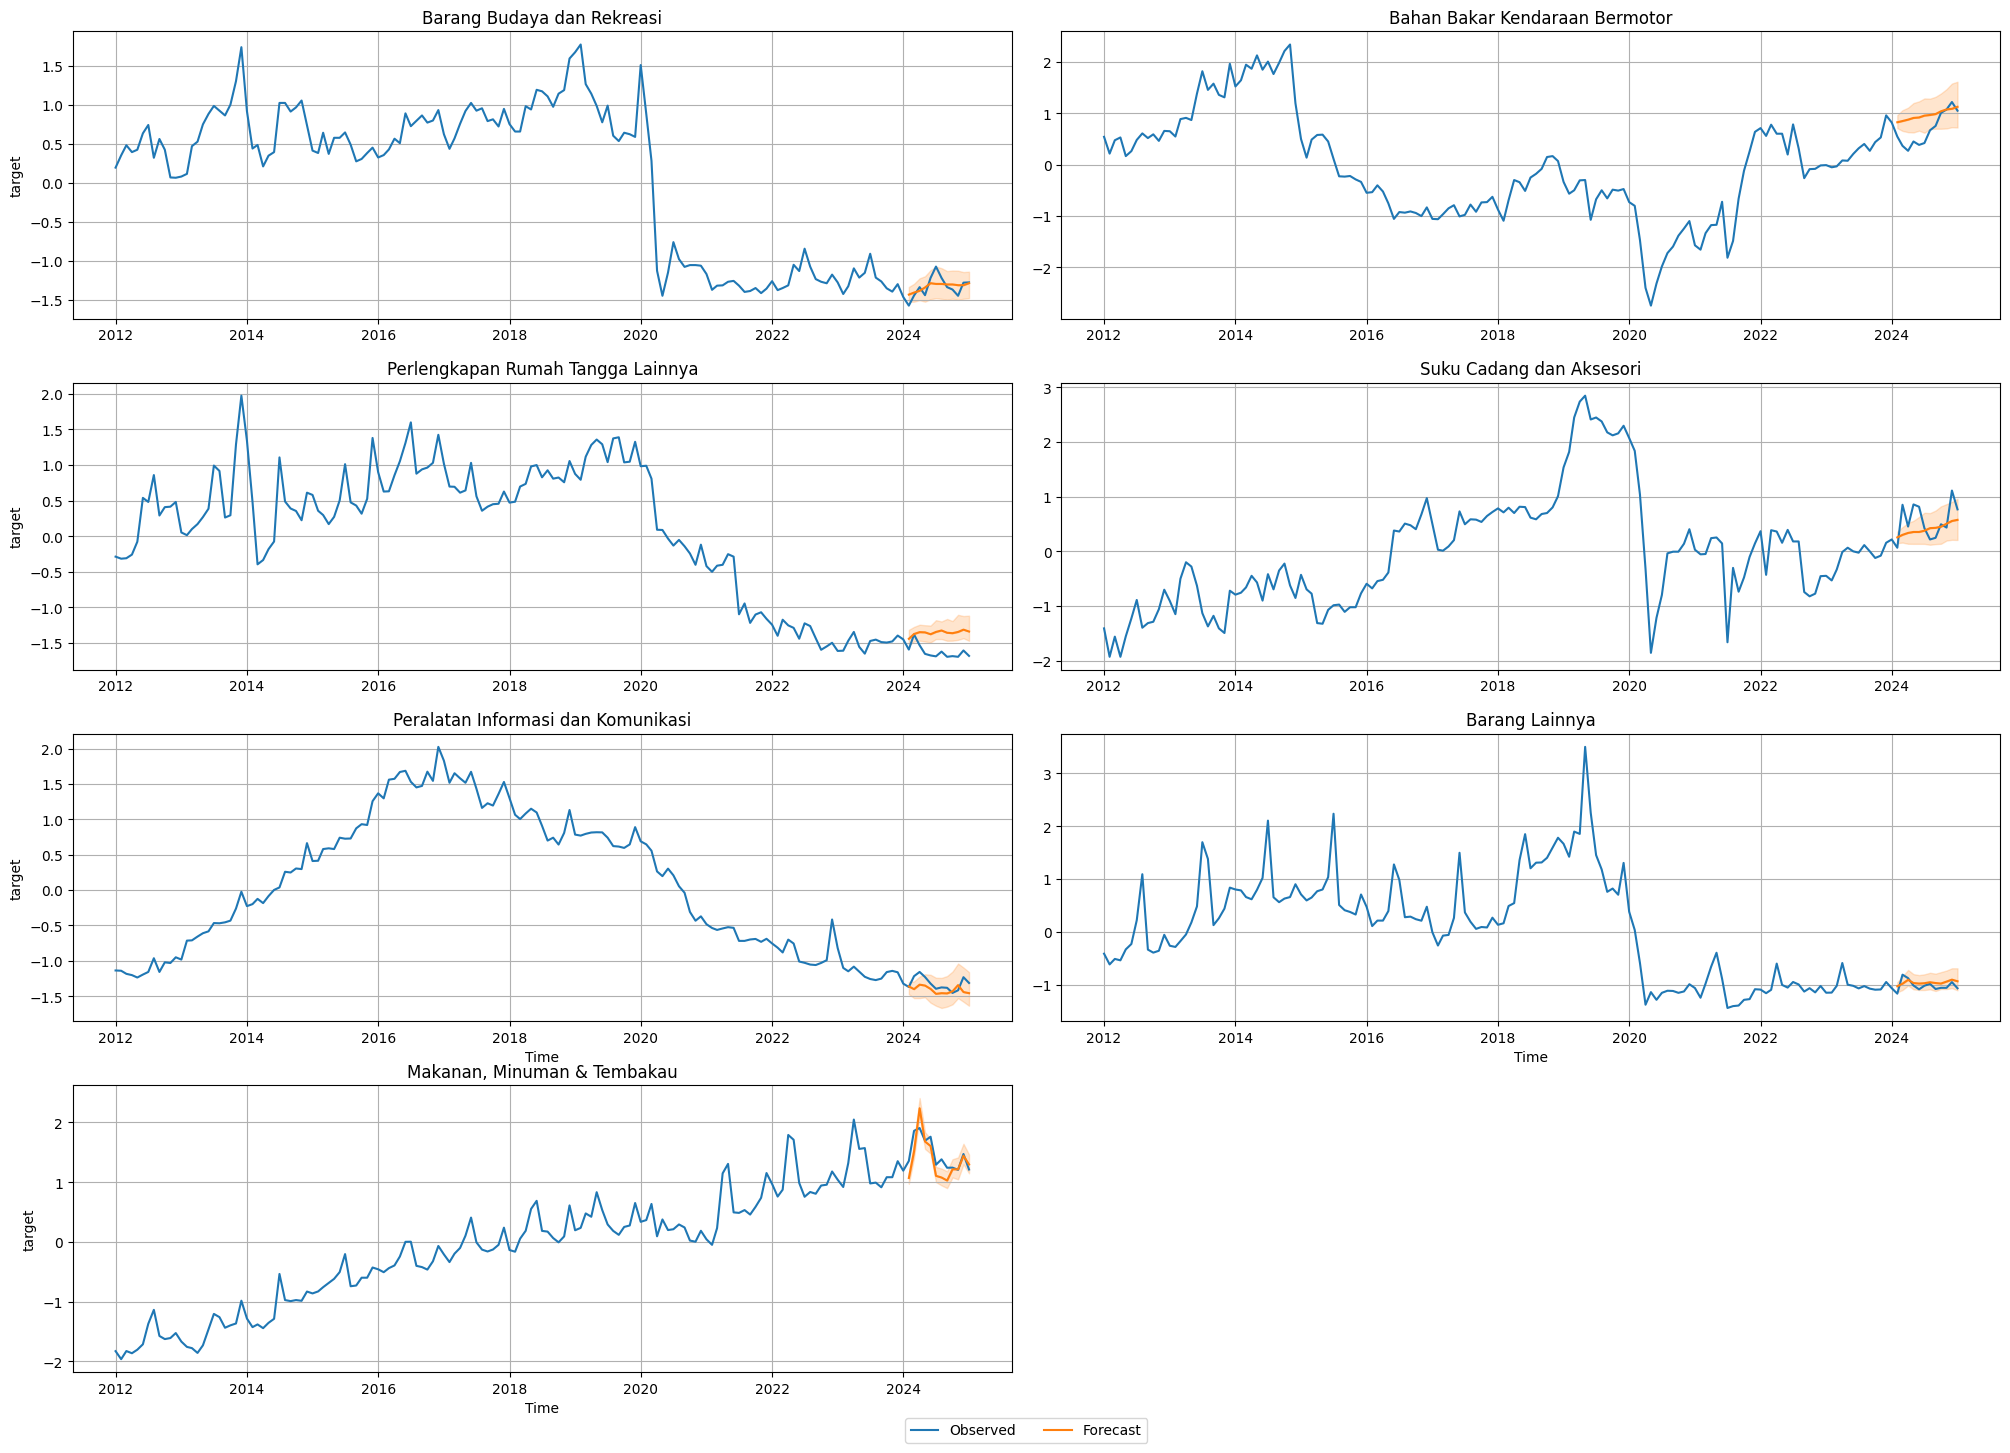

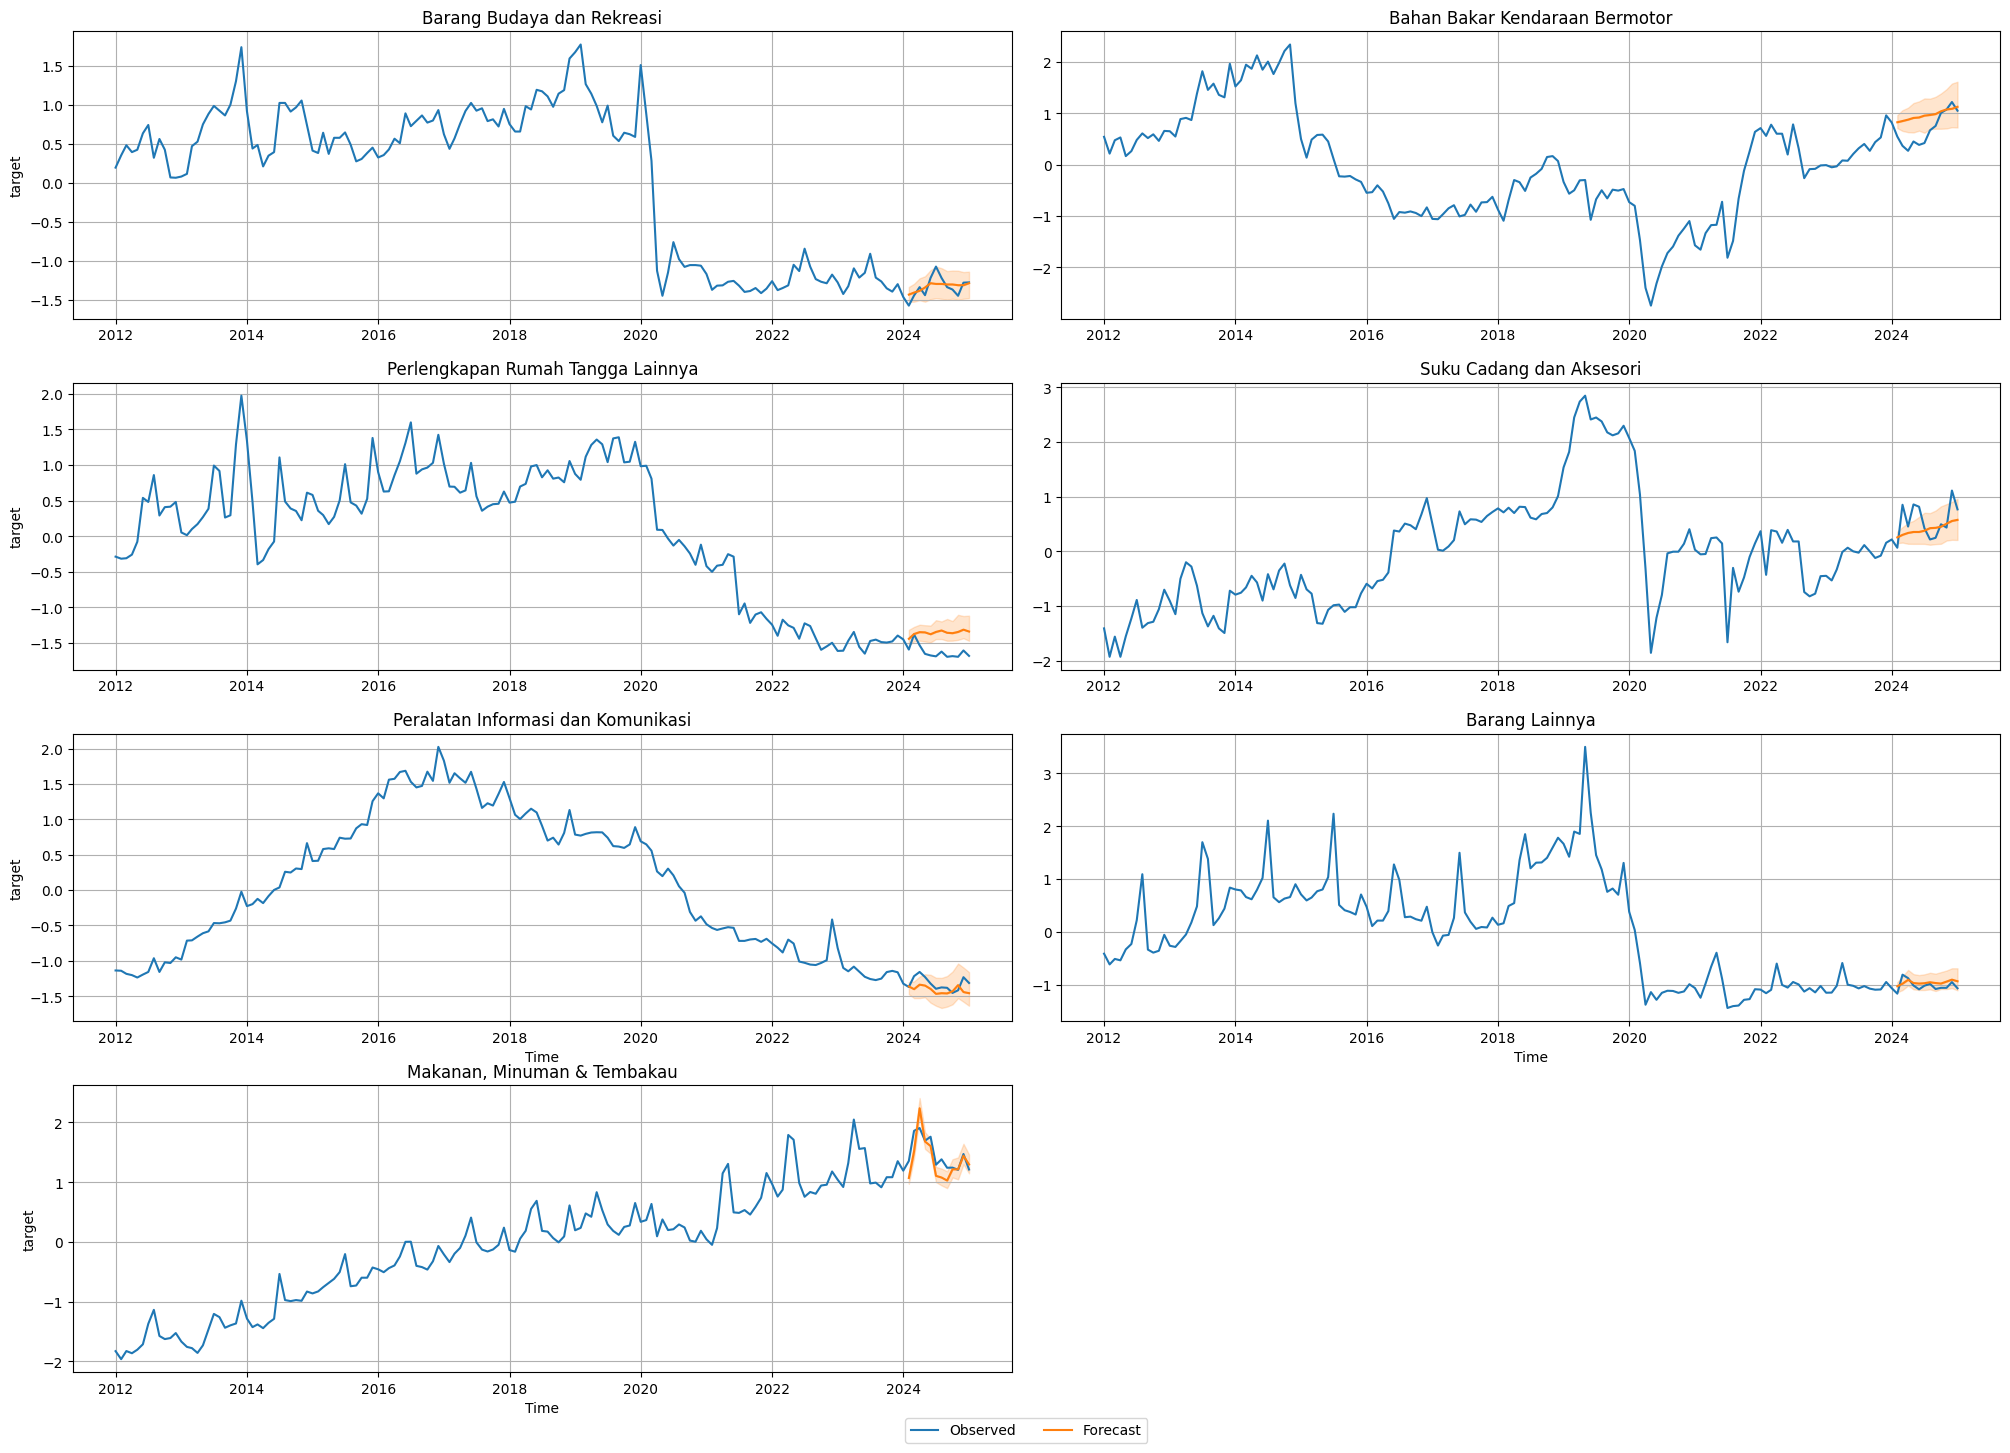

In [ ]:
predictor_chFinetune.plot(test_data, predictions_chFinetune, quantile_levels=[0.1, 0.9], max_history_length=200)

## Eval

In [ ]:
# Ekstrak Model dan Score dari Best Quality
eval_chFinetune = leaderboard_chFinetune[['model', 'SQL', 'WQL', 'MAE', 'MAPE', 'MSE', 'RMSE', 'SMAPE']].copy()
eval_chFinetune

model       SQL       WQL       MAE      MAPE  \
0        Chronos-FineTuning[base] -0.267711 -0.132853 -0.184086 -0.269867   
1       Chronos-FineTuning[small] -0.292513 -0.145394 -0.198425 -0.267805   
2        Chronos-FineTuning[mini] -0.359666 -0.161352 -0.219941 -0.277066   
3       Chronos-FineTuning[large] -0.356984 -0.186253 -0.240793 -0.345087   
4   Chronos-FineTuning[bolt_base] -0.412348 -0.211089 -0.290206 -0.366362   
5   Chronos-FineTuning[bolt_tiny] -0.401415 -0.214910 -0.308576 -0.396146   
6   Chronos-FineTuning[bolt_mini] -0.477217 -0.251203 -0.352034 -0.494201   
7  Chronos-FineTuning[bolt_small] -0.473036 -0.252376 -0.340984 -0.474630   
8        Chronos-FineTuning[tiny] -0.576349 -0.264134 -0.369792 -0.409466   

        MSE      RMSE     SMAPE  
0 -0.058618 -0.242111 -0.218059  
1 -0.068473 -0.261673 -0.246853  
2 -0.075138 -0.274113 -0.241635  
3 -0.117142 -0.342261 -0.262145  
4 -0.137470 -0.370770 -0.466387  
5 -0.172470 -0.415295 -0.515741  
6 -0.202034 -0.449482 -0.490128  
7 -0.234645 -0.484401 -0.404699  
8 -0.210147 -0.458417 -0.412542

In [ ]:
# Download Hasil
eval_chFinetune.to_csv("Chronos Finetune.csv")
files.download("Chronos Finetune.csv")

In [ ]:
# # Bar chart for Zero-Shot models (Horizontal) with value labels (sorted)
# fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(22, 18))
# axes = axes.flatten()

# for i, metric in enumerate(metrics_list):
#     if i < len(axes):
#         ax = axes[i]

#         # Sorting dataframe by the current metric in ascending order
#         sorted_df = eval_chFinetune.sort_values(by=metric, ascending=True)

#         y_labels = sorted_df['model']
#         y = range(len(y_labels))

#         bars = ax.barh(y, sorted_df[metric], height=0.6, alpha=0.7, color='green', label='Chronos FIne-Tuned')

#         # Add value labels
#         for bar in bars:
#             ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10)

#         ax.set_title(metric, fontsize=14)
#         ax.set_yticks(y)
#         ax.set_yticklabels(y_labels, fontsize=12)
#         ax.legend(fontsize=12)

# plt.tight_layout()
# plt.show()

In [ ]:
# # Simpan comparison_df ke file CSV tanpa indeks
# df_best_quality.to_csv("Best Quality_ZScore.csv")
# df_chronos.to_csv("Chronos Zero Shot_ZScore.csv")
# eval_chFinetune.to_csv("Chronos Fine Tuned_ZScore.csv")

# from google.colab import files
# files.download("Best Quality_ZScore.csv")
# files.download("Chronos Zero Shot_ZScore.csv")
# files.download("Chronos Fine Tuned_ZScore.csv")

# Chronos[base]-Finetune Visualization

In [ ]:
best_model = TimeSeriesPredictor.load('/content/drive/MyDrive/Skripsi/llm_finetune_models')

In [ ]:

predictions_best_model = best_model.predict(train_data, model='Chronos-FineTuning[base]') # Prediksi menggunakan data testing
print("\nPrediksi pada Data Testing:")
predictions_best_model


Prediksi pada Data Testing:


mean       0.1       0.2       0.3  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01  0.254539  0.151067  0.186646  0.215810   
                         2024-03-01  0.302600  0.161566  0.208810  0.262471   
                         2024-04-01  0.327389  0.139401  0.186646  0.262471   
                         2024-05-01  0.354569  0.138235  0.207644  0.268304   
                         2024-06-01  0.378775  0.138235  0.204144  0.274720   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -0.953426 -1.113370 -1.052841 -1.027162   
                         2024-10-01 -0.943644 -1.076074 -1.057732 -1.022882   
                         2024-11-01 -0.917353 -1.076686 -1.046727 -1.014934   
                         2024-12-01 -0.882870 -1.059566 -0.985586 -0.955627   
                         2025-01-01 -0.909160 -1.100530 -1.040613 -0.995980   

                                          0.4       0.5       0.6       0.7  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01  0.239140  0.256638  0.270637  0.285802   
                         2024-03-01  0.279969  0.303300  0.338296  0.355794   
                         2024-04-01  0.291635  0.338296  0.361627  0.384958   
                         2024-05-01  0.306800  0.355794  0.411788  0.466615   
                         2024-06-01  0.309133  0.355794  0.446784  0.507444   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -1.008819 -0.962964 -0.942788 -0.886538   
                         2024-10-01 -0.999037 -0.972135 -0.929337 -0.904881   
                         2024-11-01 -0.962353 -0.935451 -0.896321 -0.866362   
                         2024-12-01 -0.925668 -0.898766 -0.863305 -0.829678   
                         2025-01-01 -0.953793 -0.929337 -0.890207 -0.862082   

                                          0.8       0.9  
item_id                  timestamp                       
Suku Cadang dan Aksesori 2024-02-01  0.321965  0.361627  
                         2024-03-01  0.396623  0.443868  
                         2024-04-01  0.438619  0.519693  
                         2024-05-01  0.496945  0.559938  
                         2024-06-01  0.572771  0.629931  
...                                       ...       ...  
Barang Lainnya           2024-09-01 -0.860859 -0.786268  
                         2024-10-01 -0.841294 -0.756920  
                         2024-11-01 -0.811947 -0.726961  
                         2024-12-01 -0.805833 -0.684163  
                         2025-01-01 -0.810724 -0.684774  

[84 rows x 10 columns]

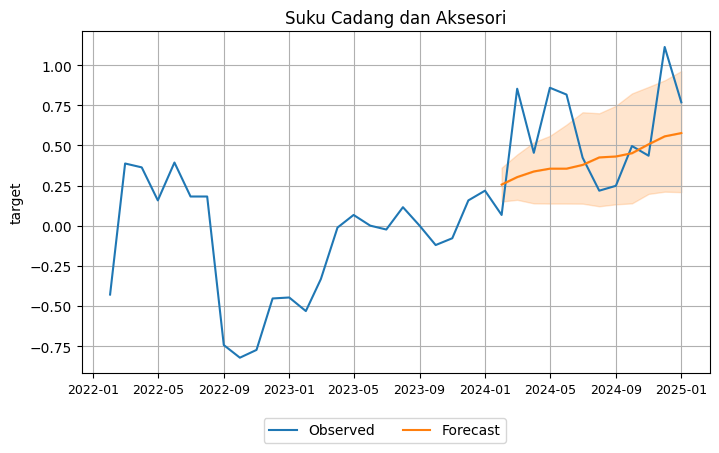

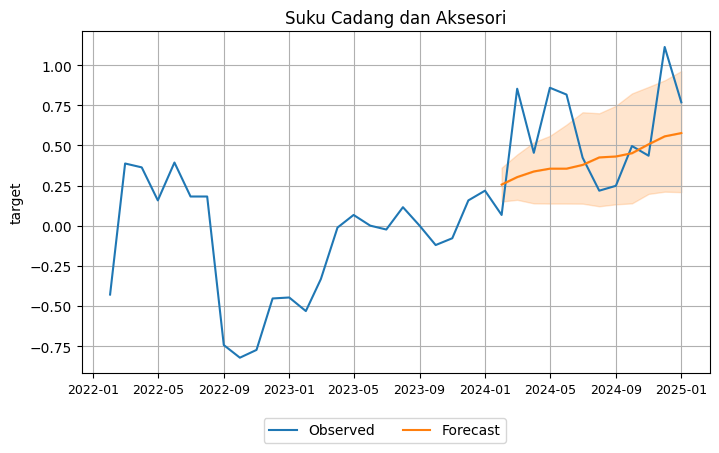

In [ ]:
best_model.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Suku Cadang dan Aksesori'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
)

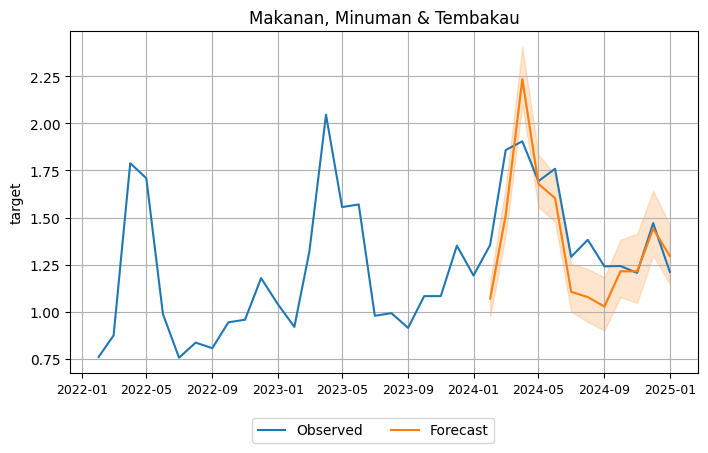

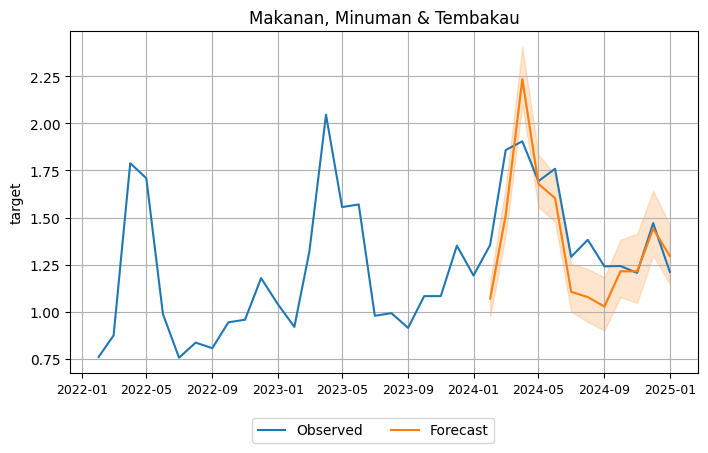

In [ ]:
best_model.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Makanan, Minuman & Tembakau'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )

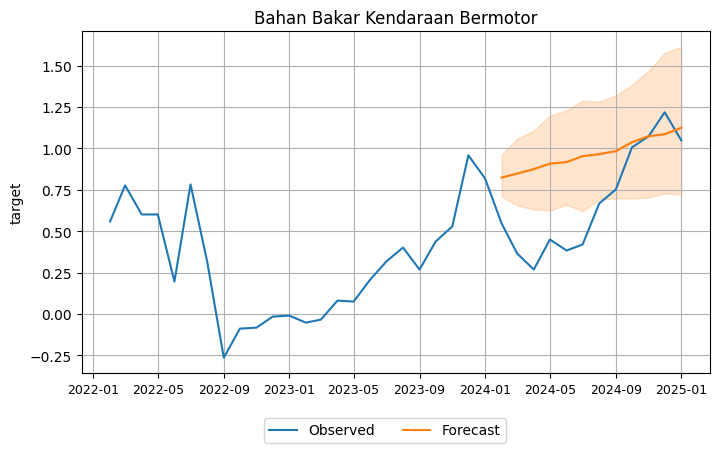

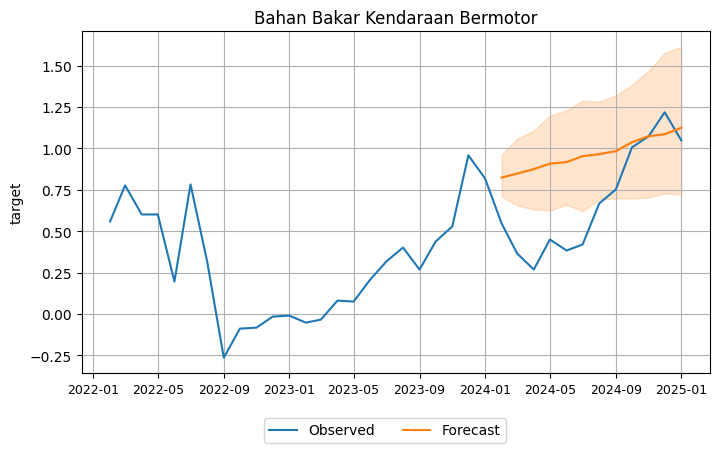

In [ ]:
best_model.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Bahan Bakar Kendaraan Bermotor'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )

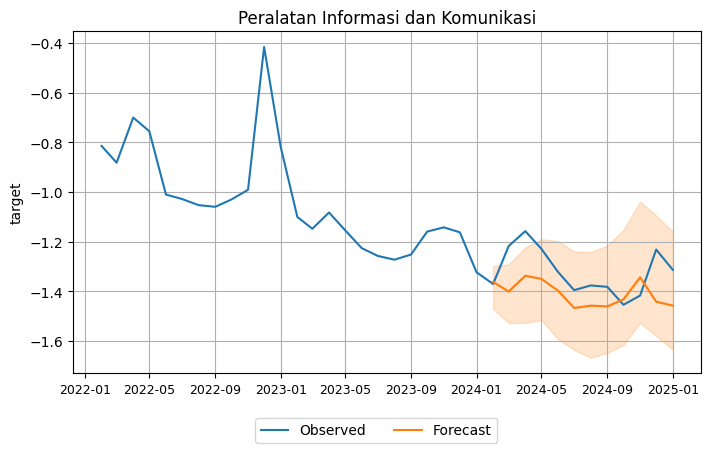

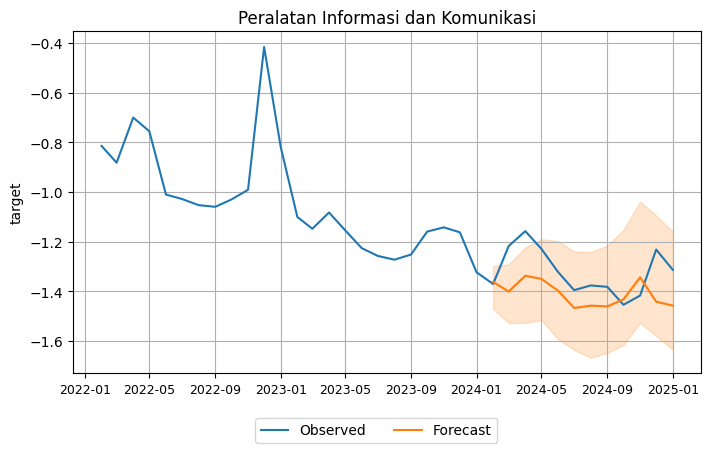

In [ ]:
best_model.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Peralatan Informasi dan Komunikasi'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )

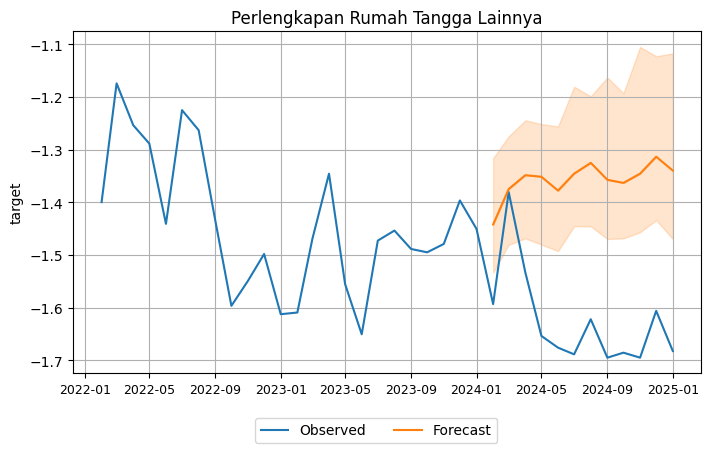

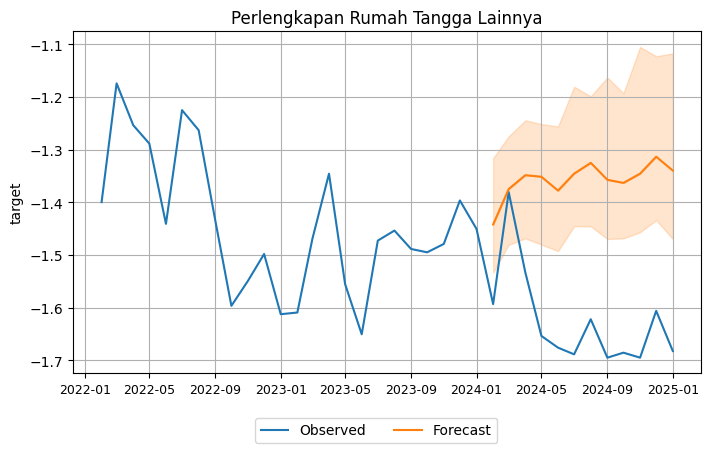

In [ ]:
best_model.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Perlengkapan Rumah Tangga Lainnya'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )

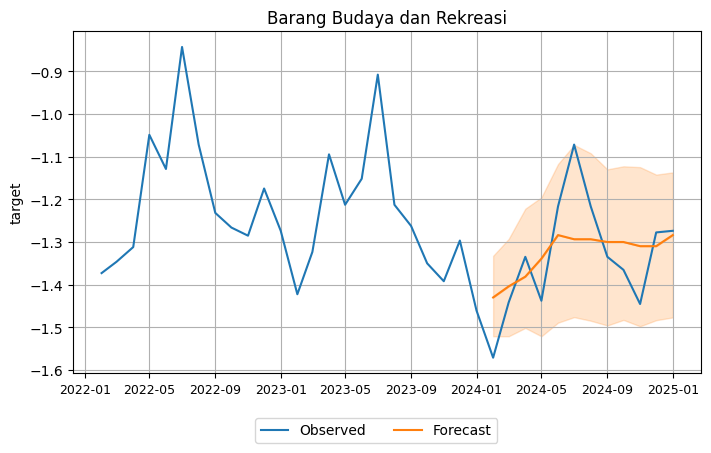

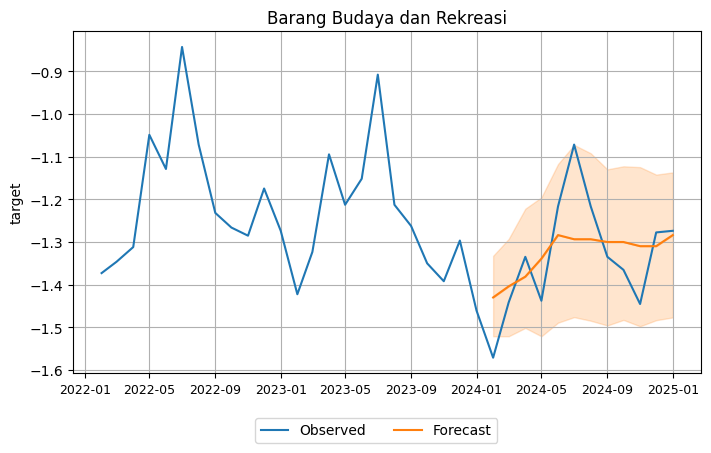

In [ ]:
best_model.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Barang Budaya dan Rekreasi'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches

    )

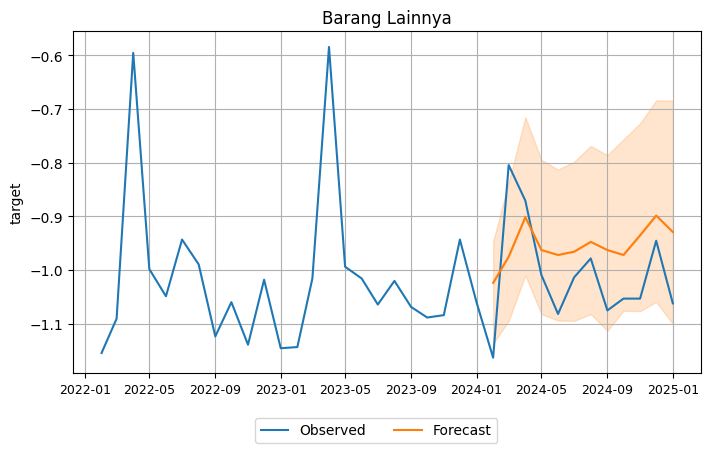

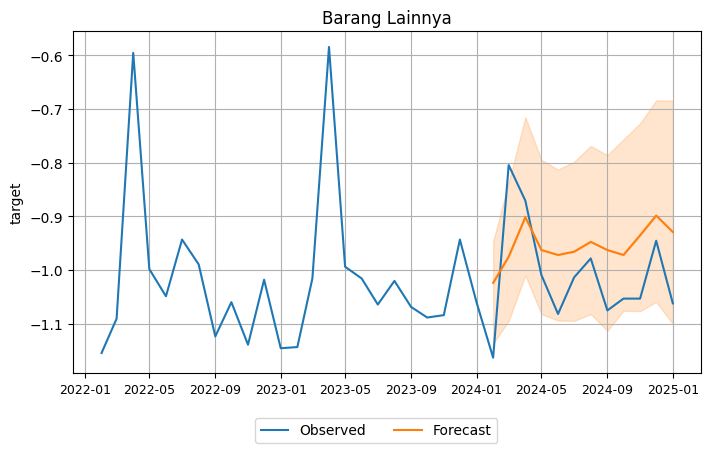

In [ ]:
best_model.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Barang Lainnya'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )

# TFT Manual Tune Visualization

In [ ]:
manual_tune = TimeSeriesPredictor.load('/content/drive/MyDrive/Skripsi/manual_tune_models')

In [ ]:
predictions_best_model = manual_tune.predict(train_data, model='TemporalFusionTransformer-Finetuning') # Prediksi menggunakan data testing
print("\nPrediksi pada Data Testing:")
predictions_best_model


Prediksi pada Data Testing:


mean       0.1       0.2       0.3  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01 -0.038731 -0.302066 -0.141556 -0.110046   
                         2024-03-01 -0.042870 -0.309440 -0.148269 -0.116614   
                         2024-04-01 -0.044919 -0.313466 -0.153652 -0.122305   
                         2024-05-01 -0.046520 -0.316052 -0.159058 -0.126755   
                         2024-06-01 -0.048133 -0.317624 -0.164485 -0.129984   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -1.013316 -1.191611 -1.098088 -1.067033   
                         2024-10-01 -1.014683 -1.188923 -1.099841 -1.065744   
                         2024-11-01 -1.015989 -1.185263 -1.100817 -1.063514   
                         2024-12-01 -1.017181 -1.180787 -1.101041 -1.060452   
                         2025-01-01 -1.005318 -1.181498 -1.069462 -1.056263   

                                          0.4       0.5       0.6       0.7  \
item_id                  timestamp                                            
Suku Cadang dan Aksesori 2024-02-01 -0.110311 -0.038731  0.001046  0.119134   
                         2024-03-01 -0.117811 -0.042870  0.008578  0.118199   
                         2024-04-01 -0.123991 -0.044919  0.015604  0.116153   
                         2024-05-01 -0.130339 -0.046520  0.022324  0.112938   
                         2024-06-01 -0.137204 -0.048133  0.028745  0.108376   
...                                       ...       ...       ...       ...   
Barang Lainnya           2024-09-01 -1.085310 -1.013316 -0.946066 -0.917640   
                         2024-10-01 -1.089928 -1.014683 -0.943615 -0.924072   
                         2024-11-01 -1.094100 -1.015989 -0.941906 -0.930822   
                         2024-12-01 -1.097767 -1.017181 -0.940948 -0.937613   
                         2025-01-01 -1.047432 -1.005318 -0.976939 -0.892542   

                                          0.8       0.9  
item_id                  timestamp                       
Suku Cadang dan Aksesori 2024-02-01  0.192933  0.134259  
                         2024-03-01  0.195254  0.146552  
                         2024-04-01  0.196769  0.154594  
                         2024-05-01  0.197177  0.160688  
                         2024-06-01  0.196260  0.165523  
...                                       ...       ...  
Barang Lainnya           2024-09-01 -0.851312 -0.859071  
                         2024-10-01 -0.856533 -0.859754  
                         2024-11-01 -0.862636 -0.861574  
                         2024-12-01 -0.869366 -0.864399  
                         2025-01-01 -0.848779 -0.881454  

[84 rows x 10 columns]

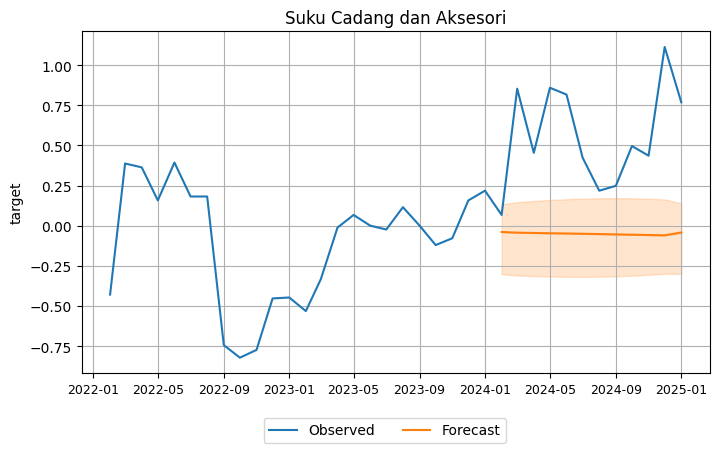

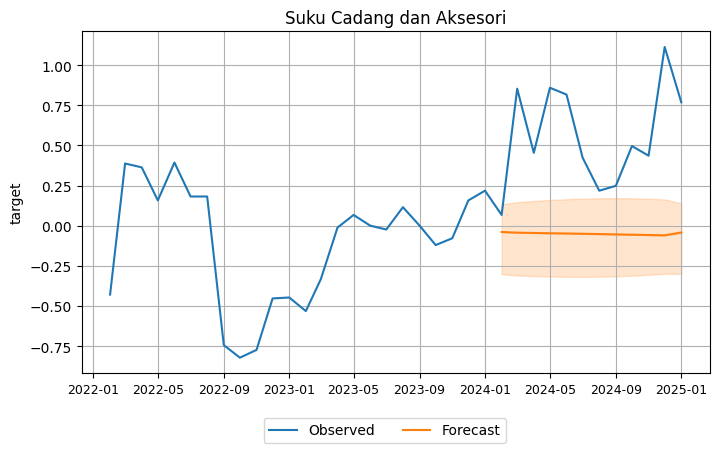

In [ ]:
manual_tune.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Suku Cadang dan Aksesori'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
)

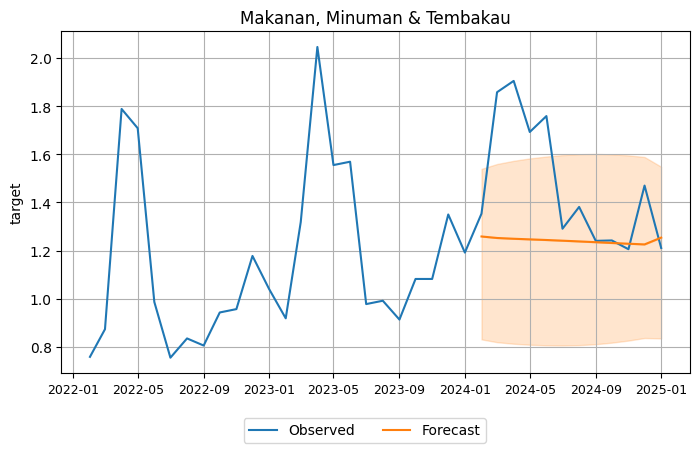

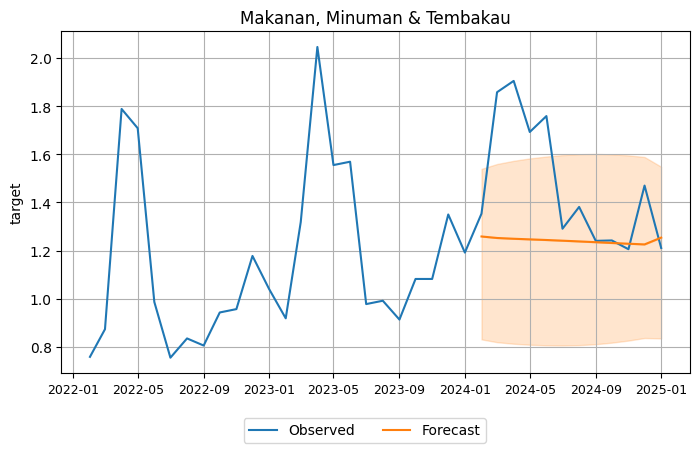

In [ ]:
manual_tune.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Makanan, Minuman & Tembakau'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )

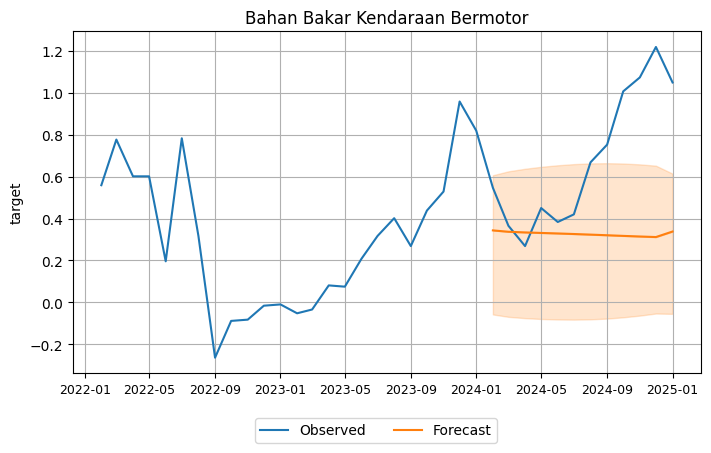

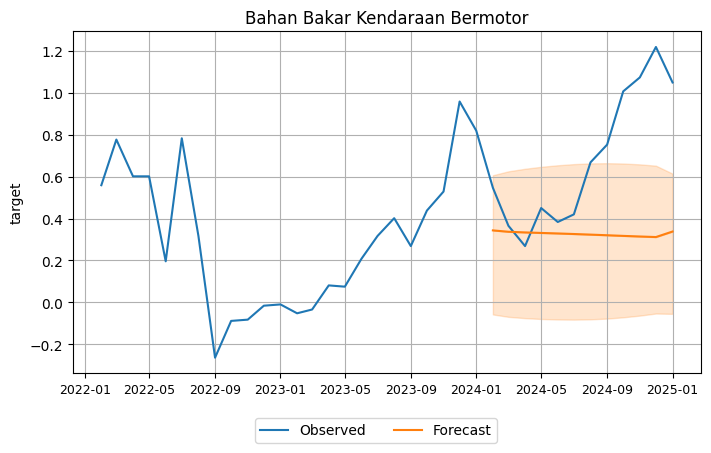

In [ ]:
manual_tune.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Bahan Bakar Kendaraan Bermotor'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )

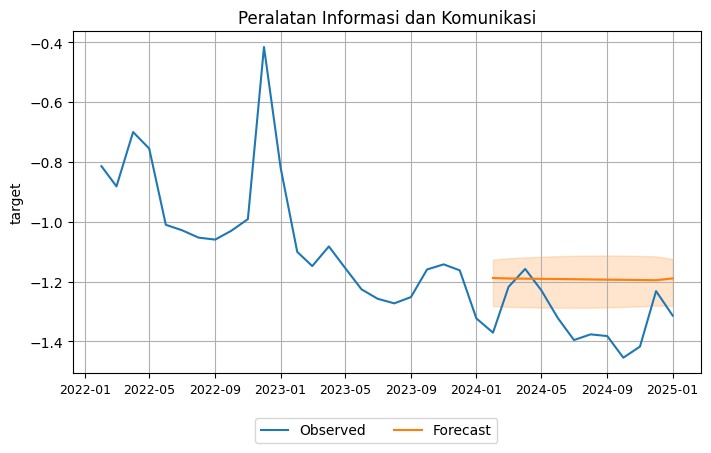

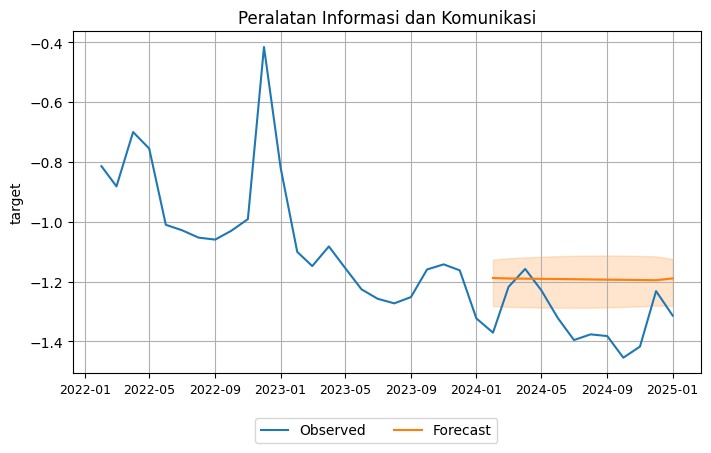

In [ ]:
manual_tune.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Peralatan Informasi dan Komunikasi'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )

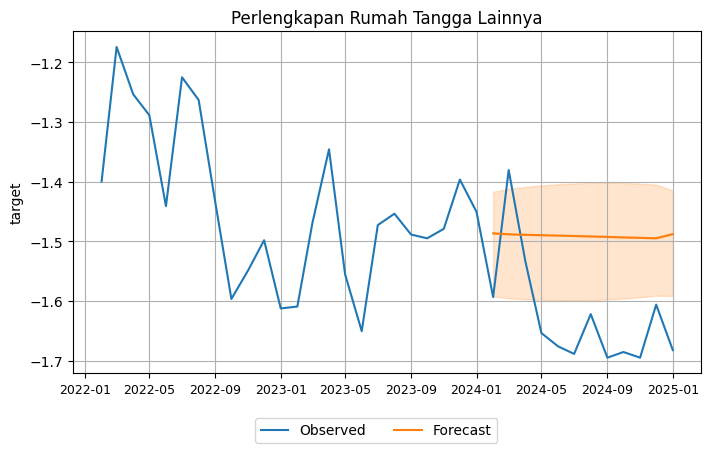

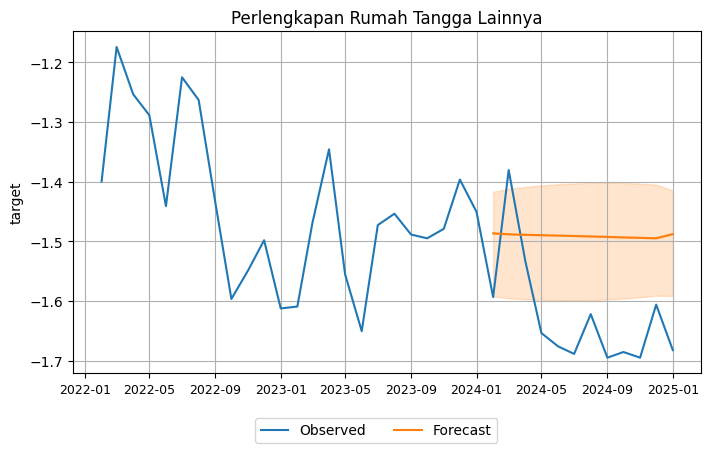

In [ ]:
manual_tune.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Perlengkapan Rumah Tangga Lainnya'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )

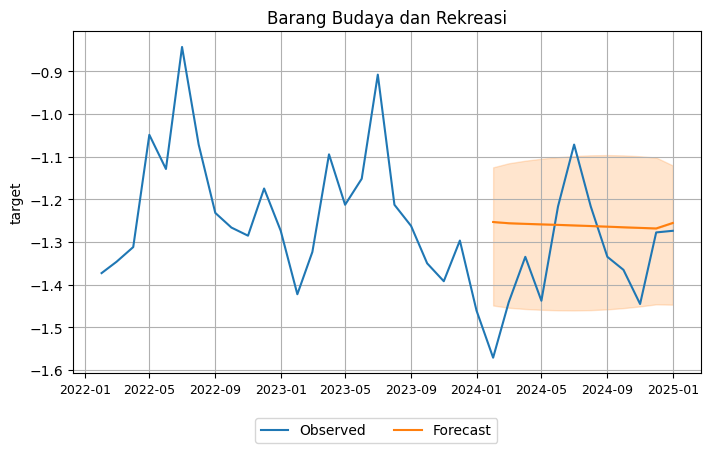

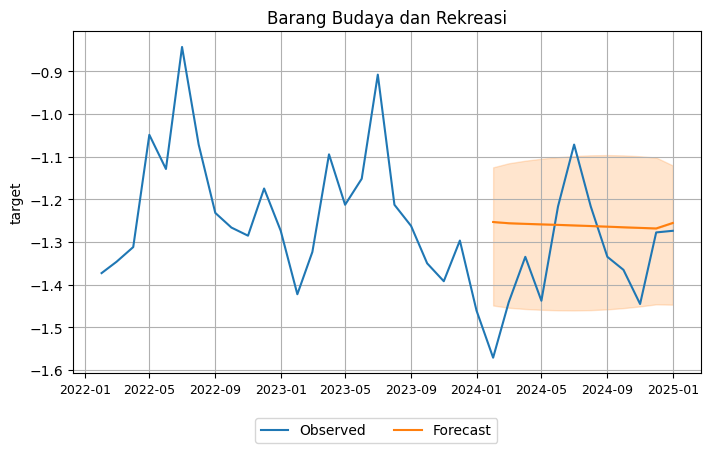

In [ ]:
manual_tune.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Barang Budaya dan Rekreasi'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches

    )

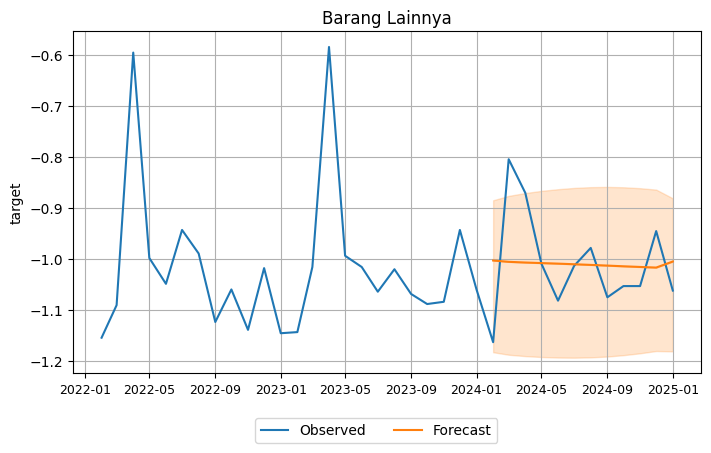

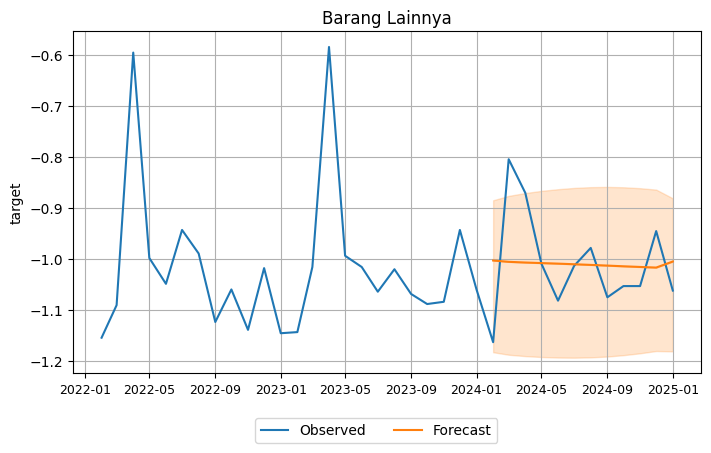

In [ ]:
manual_tune.plot(
    test_data,
    predictions_best_model,
    quantile_levels=[0.1, 0.9],
    max_history_length=36,
    item_ids=['Barang Lainnya'],
    matplotlib_rc_params={'figure.figsize': (7, 4), 'xtick.labelsize' : 9}  # Width=6, Height=4 in inches
    )